In [2]:
import numpy as np 
#Random seed for reproducibility
np.random.seed(1000)

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Plot fonts
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family']      = 'STIXGeneral'

# M124 - Coursework 1, Problem 1

---

This coursework is submitted as part of the requirements for the Machine Learning (M124) course in the DSIT's Master degree programme, of the National and Kapodistrian University of Athens. The authors of this project are (in alphabetical order):

- Kyriakos Psallidas (SID: 7115152200033)
- Michael Darmanis (SID: 7115152200004)
- Vasilios Venieris (SID: 7115152200017).

The coursework is about implementing various methods for addressing a generalized linear regression problem, utilizing a 5th degree polynomial as the true model with a zero coefficient for the 4th power term.
The exercises will involve applying the Least Squares method, Ridge Regression method, Bayesian Inference, and the Expectation-Maximization method to estimate the parameter vector and evaluate the Mean Square Error.
Additionally, the notebook will investigate the effects of utilizing different noise samples, polynomial degrees, and prior knowledge on the precision of the predictions. The  goal is to compare and contrast the different approaches and discuss the balance between bias and variance.


- Only numpy was used for the solution of the Exercises, in order to retain explainable low level code (In regards to Machine learning),but not bloated with manual matrix operations. Additionally, matplotlib or seaborn was used for plotting the graphs.

- An important remark is that the code in this notebook contains a class named `GeneralizeLinearRegression`, created from scrath with numpy. The reasoning and mathematical basis behind each method of the calss is explained in detail. 

- It is worth mentioning that the code in this notebook was created by a team of three, and as a result, the code may have variations in style due to the equally distributed workload among them. Additionally, the LaTeX equations in this notebook may not properly render in some IDEs.For this reason it is recommended to vew the notebook using a jupyter notebooks enviroment if it is available. 




---
---

# Exercise 1.1
1)	Using , $σ_η^2=0.1$ and the structure of the correct model (5th degree polynomial with the coefficient of the 4th power equal to zero), apply the Least Squares method to estimate the parameter vector. Calculate the Mean Square Error of y over the training set and over a test set comprising of 1000 points randomly selected in the interval [0,2]. 

### Solution


We have the generalized regression model:
- $y = \theta_0 + \theta_1 x  + \theta_2 x^2+ \theta_3 x^3 \theta_5 x^5+ η$ 

following matrix notation and incorporating $\theta_0$ into the $\Theta$ matrix, we can write the model as:  
- $Y = \Phi\Theta + \eta$, where $\Phi = \begin{bmatrix}  1 & x_1 & x_1^2 & x_1^3   & x_1^5  \\ 1 & x_2 & x_2^2 & x_2^3  & x_2^5  \\ \vdots & \vdots & \vdots & \vdots  & \vdots \\ 1 & x_n & x_n^2 & x_n^3 & x_n^5 &  \end{bmatrix}$ and 
$\Theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ \theta_3   \\  \theta_5  \end{bmatrix} = \begin{bmatrix}  0.2 \\-1 \\  0.9 \\ 0.7 \\  -0.2  \end{bmatrix}$

In [3]:
theta_true = np.array([ 0.2,-1, 0.9, 0.7, -0.2])
print(theta_true)

[ 0.2 -1.   0.9  0.7 -0.2]


We also require a constructor for the $Φ$ matrix:


In [4]:
# A function that takes as input training points and returns the Phi Matrix
def get_Phi_matrix(x):
  Phi =[]
  for i in range(len(x)):
    #Create the structure of the model and 1 to account for theta_0
    Phi.append([1,x[i], x[i]**2, x[i]**3, x[i]**5])
  return np.array(Phi)

#### We create in steps the funtionality of a Generalized Linear Regression model.
That will be able to carry out the tasks required for this excercise: 
1. Generate the output labels y for the training set using the `true parameter 
vector` and `noise with variance  sgima_eta= 0.1`, 

the noise can be generated using the `np.random.normal` function, which corresponds to a guassian distribution with mean 0 and variance $\sigma^2$. Its equation is: $1/\sqrt{2\pi\sigma^2}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$.
  - this is possible by using the model constructed above $$Y = \Phi\Theta + \eta$$ 

2. Estimation of the parameter vector via training with input output pairs using the Least Squared Method.
  -  We can train our generalized linear regression model by using the training $x$ inputs , $y$ ouput pairs we created with the generator, by using the least squares method in matrix form: $$\theta_{LS}=(\Phi^T \Phi)^{-1}\Phi^Ty$$ to find the optimal parameter vector: $\theta_{LS}$
3. Predictions using input data and an updated optimal parameter vector.
 - Prediction are made using the model without the noise: $$Y_{pred} = \Phi\Theta$$ for any input data. 
 - Predictions that  make up the true distributio correspondind to $$Y_{pred} = \Phi\theta_{true}$$ 
4. Evaluate the accuracy of the predictions and our estimator(extra) using Mean Squared Error (MSE).
 - We can find the predictor MSE of our predictions $Y_{pred}$ vs the true values $Y_{true}$:  $$(MSE) = \frac{1}{n} \sum_{i=1}^{n} (y_{pred}-y_{true})^2  = \frac{1}{n} (Y_{pred}-Y_{true})^T (Y_{pred}-Y_{true})$$


Using the Above knowledge we code these equation in function form and create our `GeneralizedLinearRegression` model:

In [5]:
class GeneralizedLinearRegression_LS:
  def __init__(self):
    self.theta = None

  #1.Generalized white gausian linear regression generator with 5th degree polynomial with the coefficient of the 4th power equal to zero.  
  def generate(self,Phi,theta,sigma_eta):
      #Numpy normal takes as input mean and standard deviation = sqrt(variance)
      noise = np.random.normal(0, np.sqrt(sigma_eta), Phi.shape[0])
      return np.dot(Phi,theta) + noise
    
  #2.Training function, with the Least squares method 
  def train_LS(self,Phi_train,y_train):
        self.theta = np.dot((np.dot(np.linalg.inv(np.dot(Phi_train.T, Phi_train)), Phi_train.T)), y_train)
        return self.theta
        
  #3.Generalized linear regression predictor with 5th degree polynomial with the coefficient of the 4th power equal to zero.
  def predict(self, Phi):
        return np.dot(Phi,self.theta) 

  #4.b) Predictor MSE evaluation  
  def evaluate(self,y_pred,y_true, verbose = False):
    if verbose:
      print('predictions are:\n',y_pred)
      print('true y values are:\n',y_true)
      print(f'Calculating predictor MSE: 1/{len(y_true)}*(y_pred-y_true).T,(y_pred-t_true))')
    return (1/len(y_true))* np.dot((y_pred-y_true).T,(y_pred-y_true))

We consider $N$ equidistant points $x_1,x_2,...,x_n$ in the interval $[0,2]$ and
use them to create samples for our training set, we can generate these points using:

In [6]:
start = 0
end = 2
N = 20
#N equidistant points for x 
x_train = np.linspace(start, end, N)
print('the training points generated are:', x_train)

#The corresponding Phi matrix generated is:
Phi_train = get_Phi_matrix(x_train)
print('\nThe first 5 rows of Phi matrix are:', Phi_train[0:5,:])

the training points generated are: [0.         0.10526316 0.21052632 0.31578947 0.42105263 0.52631579
 0.63157895 0.73684211 0.84210526 0.94736842 1.05263158 1.15789474
 1.26315789 1.36842105 1.47368421 1.57894737 1.68421053 1.78947368
 1.89473684 2.        ]

The first 5 rows of Phi matrix are: [[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.00000000e+00 1.05263158e-01 1.10803324e-02 1.16635078e-03
  1.29235543e-05]
 [1.00000000e+00 2.10526316e-01 4.43213296e-02 9.33080624e-03
  4.13553739e-04]
 [1.00000000e+00 3.15789474e-01 9.97229917e-02 3.14914711e-02
  3.14042371e-03]
 [1.00000000e+00 4.21052632e-01 1.77285319e-01 7.46464499e-02
  1.32337197e-02]]


Before proceeding we initialize and instance of our model:

In [7]:
model = GeneralizedLinearRegression_LS()

1. As mentioned before using the white Gausian noise generalized linear regression generator $Y = \Phi\Theta + \eta$, we now compute the training set labels for each training point and create `y_train` using $\sigma^2_η = 0.1$:

In [8]:
#We now compute the model outcome for each training point passing in the theta_true parameters with the variance of the noise = 0.1
y_train = model.generate(Phi_train, theta_true,sigma_eta=0.1)
print('The model outcome label for each training point is:\n',y_train)

The model outcome label for each training point is:
 [-0.05439205  0.20701047  0.02775334  0.19913025 -0.10701033  0.14013283
  0.04970269  0.03661617  0.51761294  0.35601125  0.91358567  0.66425608
  0.76228182  1.22256744  1.47342069  1.6901913   1.65882036  1.85695744
  1.81598854  0.6879631 ]


2. With the method described  we can train our generalized linear regression model y_pred by using the x_train inputs , y_train ouput pairs.

In [9]:
#Using our model instance we can train it
model.train_LS(Phi_train,y_train)
print('\nIn contrast to the true vector',theta_true)


In contrast to the true vector [ 0.2 -1.   0.9  0.7 -0.2]


3. Having trained our model, we can make predictions:
- On the training test  of $N = 20$

In [10]:
y_train_pred = model.predict(Phi_train)
print('The model has predicted the following labels for the training set:\n',y_train_pred)

The model has predicted the following labels for the training set:
 [-0.02367556  0.07285095  0.11246769  0.1167547   0.10604719  0.09881303
  0.11103034  0.15556507  0.24154855  0.37375504  0.55197931  0.77041421
  1.01702819  1.27294293  1.51181085  1.69919269  1.79193507  1.73754808
  1.47358279  0.92700887]


  - On an unknown test set of $N = 1000$

In [11]:
#First we generate the test set using uniform random sampling 
X_test = np.random.uniform(0,2,1000)

#We construct the corresponding Phi_test matrix
Phi_test = get_Phi_matrix(X_test)

#We generate their labels using the model generator with the true parameters, this will be used at the MSE evaluations stage:
y_test = model.generate(Phi_test,theta_true,sigma_eta=0.1)

#We make predictions
y_test_pred = model.predict(Phi_test)
print(f'The model has predicted the following first 30 of {y_test_pred.shape[0]} labels for the training set:\n',y_test_pred[0:30])

The model has predicted the following first 30 of 1000 labels for the training set:
 [1.47918566e-01 4.81175554e-02 1.79443251e+00 1.14215594e+00
 1.62341649e+00 6.62837935e-01 1.76121503e+00 1.70752355e+00
 1.01161983e-03 9.50108506e-02 9.99028529e-02 1.17819449e-01
 1.33807538e+00 1.98717809e-01 1.76522631e+00 1.12758074e-01
 2.66294364e-01 1.74042706e-02 1.30743977e+00 3.62075242e-01
 1.17449395e-01 1.74666990e+00 1.64984071e+00 9.38303457e-02
 6.35217740e-02 2.80327450e-01 8.74607272e-01 1.08407317e-01
 1.26188527e+00 1.06389680e-01]


 4. Our next and final goal is to evaluate the model over our 20 training set points and over a test in the same value interval of [0,2] but with 1000 points with the $MSE$ as described while constructing the model.


- For the training set predictions



In [12]:
# We use the evaluation function of our model
Training_set_MSE = model.evaluate(y_train_pred,y_train,verbose=True)

print('\nThe MSE of the predictions on the training set versus their true value is:',Training_set_MSE)

predictions are:
 [-0.02367556  0.07285095  0.11246769  0.1167547   0.10604719  0.09881303
  0.11103034  0.15556507  0.24154855  0.37375504  0.55197931  0.77041421
  1.01702819  1.27294293  1.51181085  1.69919269  1.79193507  1.73754808
  1.47358279  0.92700887]
true y values are:
 [-0.05439205  0.20701047  0.02775334  0.19913025 -0.10701033  0.14013283
  0.04970269  0.03661617  0.51761294  0.35601125  0.91358567  0.66425608
  0.76228182  1.22256744  1.47342069  1.6901913   1.65882036  1.85695744
  1.81598854  0.6879631 ]
Calculating predictor MSE: 1/20*(y_pred-y_true).T,(y_pred-t_true))

The MSE of the predictions on the training set versus their true value is: 0.029591066085078107


We can plot the training set predictions and the true values to see how well our model fits the data:

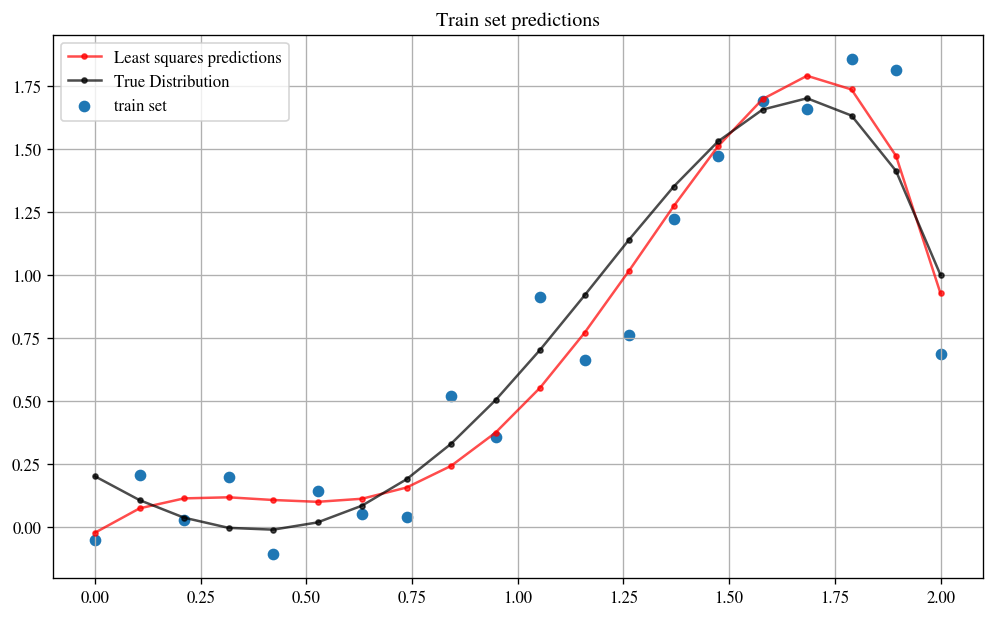

In [13]:
plt.figure(figsize=(10,6),dpi=120)
plt.grid(True)
plt.title('Train set predictions')
plt.scatter(x_train,y_train, label='train set')
plt.plot(x_train, y_train_pred, color = 'red',marker='.', label='Least squares predictions' , alpha = 0.7)
plt.plot(x_train,Phi_train@theta_true, color = 'black',marker='.', label='True Distribution' , alpha = 0.7)
plt.legend()
plt.show()

---

- For the test set predictions

In [14]:
#We do not use the verbose option since we have 1.000 input output pairs
Test_set_MSE = model.evaluate(y_test_pred,y_test,verbose=False )
print('\nThe MSE of the predictions on the test set versus their true value is:',Test_set_MSE)


The MSE of the predictions on the test set versus their true value is: 0.11373637837655613


We can plot the testing set predictions and the true values to see how well our model fits the data:

**Notice how the shape of the predicted distribution has overfit the training set, and does not generalize well to the test set.**

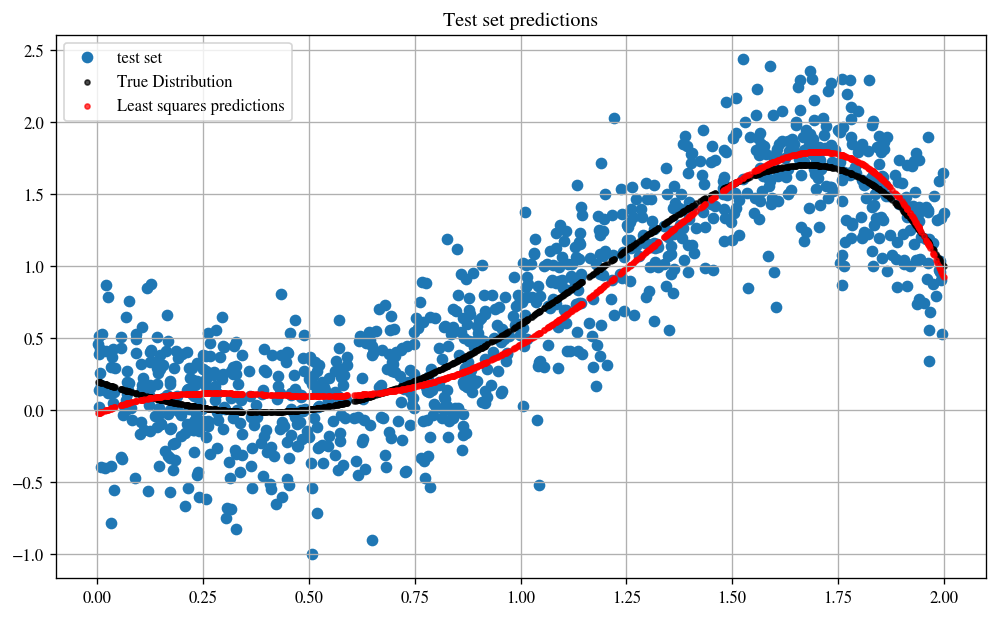

In [15]:
plt.figure(figsize=(10,6),dpi=120)
plt.grid(True)
plt.title('Test set predictions')
plt.scatter(X_test,y_test, label='test set')
plt.scatter( X_test, Phi_test@theta_true, color = 'black',marker='.', label='True Distribution' , alpha = 0.7)
plt.scatter( X_test, y_test_pred, color = 'red',marker='.', label='Least squares predictions' , alpha = 0.7)
plt.legend()
plt.show()

---

### Results of Exercise 1.1:

#### MSE over the training set and test set, results:
The tremendous difference between the MSE of the training set and the test set is a clear indication of overfitting which we expected to happen, the reasons are:
- We have a small training set of 20 points, which is not enough to capture the true underlying true distribution.
- We used the Least Squares cost function to train our model which is unbiased, this means that it is very sensitive to the particular noise pattern present in the training set and will overfit to it in the case of a 5th degree polynomial model generating model which has medium to high variance, rather than capturing the true underlying distribution. 


#### **(Extra)**  Estimator MSE (Proof of Least Squares being unbiased):
We can prove the the Least Squares estiamator is unbiased by utilizing the Estimator Mean Square Error (EMSE) equation, which is as follows: 

$MSE = E[(\hat{θ} -θ_0)^2] \implies 
E[(\hat{θ} - E[\hat{θ}])^2] + (Ε[\hat{θ}] - θ_0 )^2 \implies 
var(\hat{θ}) + bias^2(\hat{θ})$

In [16]:
#theta_true corresponds to the given true estimator values and N are the number of training sets utilized to find 
estimator = []
for tain_test in range(500):
    #create a train test with N = 20 and generate its output labels with noise of variance 0.1 and the true parameter
    X_train = np.random.uniform(0,2.01,20)
    Phi_train = get_Phi_matrix(X_train)
    y_train = model.generate(Phi_train, theta_true, sigma_eta=0.1)
    #find the corresponding estimator 
    theta_LS = np.dot((np.dot(np.linalg.inv(np.dot(Phi_train.T, Phi_train)), Phi_train.T)), y_train)
    estimator.append(theta_LS)
estimator = np.vstack(estimator)
  #variance 
variance = np.sum(((estimator - estimator/500)**2).mean(0))
  #bias 
bias = np.sum(estimator.mean() - theta_true)
  #MSE 
MSE = np.sum(variance + bias**2)

print(f"After 500 generated sets of 20 input and outputs, the Least squres estimator's:\n Variance is {variance} \n Bias is {bias} \n MSE is {MSE}") 

After 500 generated sets of 20 input and outputs, the Least squres estimator's:
 Variance is 80.37854096005577 
 Bias is -0.007335492174409486 
 MSE is 80.37859476950122


- The least squares estimator is unbiased and is susceptible to high variance.

For this reason reguralization techniques or different parameter estimation methods can be used to reduce the variance of the estimator and inject optimal bias, thus improving its generalization capabilities.

---
---

# Exercise 1.2
For $Ν=20$ and $\sigma^2_\eta=0.1$ apply regression using the Least Squares method and a 2nd degree polynomial. Perform 100 experiments using different noise samples for each experiment. For each point of the training set, calculate the mean and variance of y over the 100 experiments and plot these quantities on the (x,y) plane along with the curve obtained by the true model. 
Repeat using a 10th degree polynomial. Compare your results obtained for the 2 different cases (2nd versus 10th degree polynomial) making special reference to the bias-variance dilemma. 


### Solution

For this exercise we will use the same model as before but with a different polynomial degree, we will use a 2nd degree polynomial and a 10th degree polynomial. In order to do create $\Phi$ matrix constructors like `get_Phi_matrix`, but for a 2nd and 5th polynomial degree. 

- In the case of a second degree polynomial the $\Phi$ matrix is of the form: $$\begin{bmatrix} 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ ... & ... & ... \\ 1 & x_n & x_n^2 \end{bmatrix}$$ Thus the parameter vector is of the form: $\begin{bmatrix} \theta_0 & \theta_1 & \theta_2 \end{bmatrix}^T$

- In the case of a tenth degree polynomial the $\Phi$ matrix is of the form: $$\begin{bmatrix} 1 & x_1 & x_1^2& ... & x_1^9 & x_1^{10} \\ 1 & x_2 & x_2^2 & ... & x_2^9 & x_2^{10} \\ ... & ...  & ... & ... &...&...\\ 1 & x_n & x_n^2 & ... & x_n^9 & x_n^{10} \end{bmatrix}$$ 

Thus the parameter vector is of the form: $\begin{bmatrix} \theta_0 &\theta_1 & \theta_2 & \theta_3 &  \theta_4 &  \theta_5 & \theta_6 &  \theta_7  &\theta_8 & \theta_9 & \theta_{10} \end{bmatrix}^T$

We can then estimate the optimal parameter vector for each polynomial degree using the Least Squares method as shown in the previous exercise

We can now create the `get_Phi_matrix` function for the 2nd and 10th degree polynomial, as well as initialze the true parameter vectors.
Following that we can generate the X training set with in [0,2] and $N=20$, of course we pass it into the corresponding `get_Phi_matrix` function to create the $\Phi$ matrix for each polynomial degree.

In [17]:
# Phi matrix for the 2nd degree polynomial
def get_Phi_matrix_2nd(x):
  Phi =[]
  for i in range(len(x)):
    #Create the structure of the model and 1 to account for theta_0
    Phi.append([1,x[i], x[i]**2])
  return np.array(Phi)

# Phi matrix for the 10th degree polynomial
def get_Phi_matrix_10rd(x):
  Phi =[]
  for i in range(len(x)):
    #Create the structure of the model and 1 to account for theta_0
    Phi.append([1,x[i], x[i]**2, x[i]**3, x[i]**4, x[i]**5, x[i]**6, x[i]**7, x[i]**8, x[i]**9, x[i]**10])
  return np.array(Phi)


#We generate the training set
X_train = np.linspace(0,2,20)

#We construct the corresponding Phi_train matrix for the 2nd and 10th degree polynomial as well as the true model.
Phi_train_2nd = get_Phi_matrix_2nd(X_train)
Phi_train_10th = get_Phi_matrix_10rd(X_train)
Phi_train = get_Phi_matrix(X_train)


# Noise variance is known and constant 
sigma_eta = 0.1

Having the above we can now find the true output labels using the true model from Exercise `1.1`.

In [18]:
# True model labels 
y_true = Phi_train@theta_true

Finally we create the target labels for the training set with different values from white Gaussian noise generator with $\sigma^2_\eta = 0.1$ for 100 expiriments 

In [19]:
Experiment = []
# We creat the nosie sample using a different seed for each iteration
for i in range(100):
  # We create the noise sample using a different seed for each iteration
  np.random.seed(i)
  y_train = model.generate(Phi_train, theta_true, sigma_eta)
  Experiment.append(y_train)
Y_train_experiments = np.array(Experiment)
print('100 experiments of 20 output training labels:\n',Y_train_experiments.shape)

100 experiments of 20 output training labels:
 (100, 20)


----

#### 2nd degree polynomial case:

In [20]:
model_2nd = GeneralizedLinearRegression_LS()

We can train the 2nd degree polynomail model and make predictions for each experiment using the Least Squares method of the `GeneralizedLinearRegression` model:

In [21]:
Experiment_2nd = []
for i in range(100):
  # we tain the model on each of the 100 experiments
  model_2nd.train_LS(Phi_train_2nd,Y_train_experiments[i])
  # Make predictions on the training set
  y_train_pred = model_2nd.predict(Phi_train_2nd)
  Experiment_2nd.append(y_train_pred)
Y_pred_experiments_2nd = np.array(Experiment_2nd)
print('100 experiments of 20 predicted output labels for the 2nd degree polynomial using the Least sqaured method:\n',Y_pred_experiments_2nd.shape)

100 experiments of 20 predicted output labels for the 2nd degree polynomial using the Least sqaured method:
 (100, 20)


The task is to calculate the mean and variance of y over the 100 experiments and plot these quantities on the (x,y) plane along with the curve obtained by the true model. 

In order to calculate the mean and variance of y over each observation between experiments  we need to calculate the mean $\mu$ and variance $\sigma^2$ column-wise in the matrix `Y_pred_experiments_2nd` which contains the predictions using the Least squares method, for each experiment in each row and each observation in each column.
- $Mean = \mu_{y} = \frac{1}{n}\sum\limits_{i=1}^n y_i$
- $Variance = \sigma^2 = \frac{1}{n}\sum\limits_{i=1}^n (y_i - \mu_{y})^2$

We also compute the standard deviation $\sigma$ as the square root of the variance $\sigma^2$, to use it to plot the prediction error bars, since it has the same scale as the mean.

In [22]:
# Mean and standard deviation of the predicted output labels using least squares.
y_mean_2nd = np.mean(Y_pred_experiments_2nd, axis=0) 
y_var_2nd = np.var(Y_pred_experiments_2nd, axis=0)
y_stds_2nd = np.std(Y_pred_experiments_2nd, axis=0)

Finally we plot the mean and standard deviation of the predicted y over the 100 experiments along with the curve obtained by the true model.

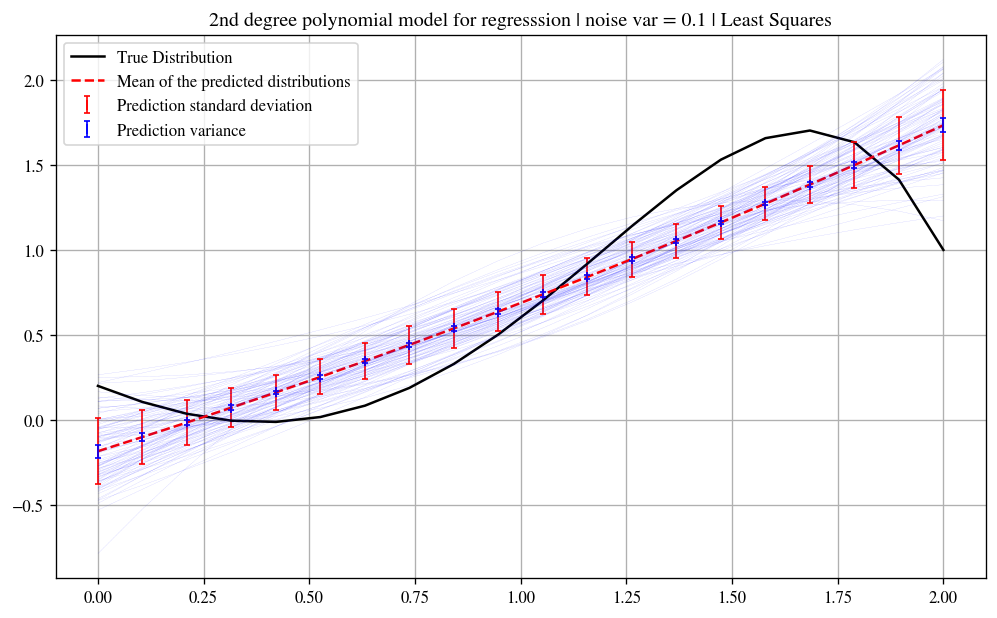

In [23]:
plt.figure(figsize=(10,6),dpi=120)
plt.grid(True)
plt.title('2nd degree polynomial model for regresssion | noise var = 0.1 | Least Squares') 
plt.plot(X_train, y_true, color = 'black', label='True Distribution')
plt.plot(X_train, y_mean_2nd, linestyle = 'dashed',color = 'red',  label='Mean of the predicted distributions')
for i in range(100):
  plt.plot(X_train, Y_pred_experiments_2nd[i], linestyle = 'dashed',color = 'blue',  linewidth = 0.1, alpha = 0.5)
plt.errorbar(X_train, y_mean_2nd, yerr=y_stds_2nd, fmt='|', color='red', ecolor='red', elinewidth=1, capsize=2, label='Prediction standard deviation')
plt.errorbar(X_train, y_mean_2nd, yerr=y_var_2nd, fmt='|', color='blue', ecolor='blue', elinewidth=1, capsize=2, label='Prediction variance')
plt.legend()
plt.show()

We can additionally calculate the Bias and Variance of the model using the following equations:
- $Bias^2 = (E[\hat{y}] - y)^2$
- $Variance = E[(\hat{y} - E[\hat{y}])^2]$

We expresses them as the mean of their respective components ( corresponding to each observation):

In [24]:
Bias_squared_2nd = ((y_mean_2nd - y_true)**2)
Variance_2nd = y_var_2nd

print('Mean Bias squared for the 2nd degree polynomial model using least squares is:',np.mean(Bias_squared_2nd))
print('Mean Variance for the 2nd degree polynomial model using least squares is:',np.mean(Variance_2nd))
print('Mean MSE for the 2nd degree polynomial model using least squares is:',np.mean(Bias_squared_2nd + Variance_2nd))

Mean Bias squared for the 2nd degree polynomial model using least squares is: 0.07983455015763721
Mean Variance for the 2nd degree polynomial model using least squares is: 0.01633446014086711
Mean MSE for the 2nd degree polynomial model using least squares is: 0.09616901029850432


#### 10th degree polynomial case:

In [25]:
model_10th = GeneralizedLinearRegression_LS()

Following that we can train our model and make predictions for each experiment using the Least Squares method of our `GeneralizedLinearRegression` model:

In [26]:
Experiment_10th = []
for i in range(100):
  # we tain the model on each of the 100 experiments
  model_10th.train_LS(Phi_train_10th,Y_train_experiments[i])
  # Make predictions on the training set
  y_train_pred = model_10th.predict(Phi_train_10th)
  Experiment_10th.append(y_train_pred)
Y_pred_experiments_10th = np.array(Experiment_10th)
print('100 experiments of 20 predicted output labels for the 2nd degree polynomial using the Least sqaured method:\n',Y_pred_experiments_10th.shape)

100 experiments of 20 predicted output labels for the 2nd degree polynomial using the Least sqaured method:
 (100, 20)


We find the mean and variance of y over the 100 experiments and plot these quantities on the (x,y) plane along with the curve obtained by the true model. As explained in the case of the 2nd degree polynomial, we calculate the mean and variance of y over each observation between experiments  we need to calculate the mean $\mu$ and the standard deviation = $\sqrt{\sigma^2}$ column-wise in the matrix `Y_pred_experiments_10th` which contains the predictions using the Least squares method, for each experiment in each row and each observation in each column. 

In [27]:
# Mean and standard deviation of the predicted output labels using least squares.
y_mean_10th = np.mean(Y_pred_experiments_10th, axis=0) 
y_stds_10th = np.std(Y_pred_experiments_10th, axis=0)
y_var_10th = np.var(Y_pred_experiments_10th, axis=0)

Finally we plot the mean and standard deviation of the predicted y over the 100 experiments along with the curve obtained by the true model.

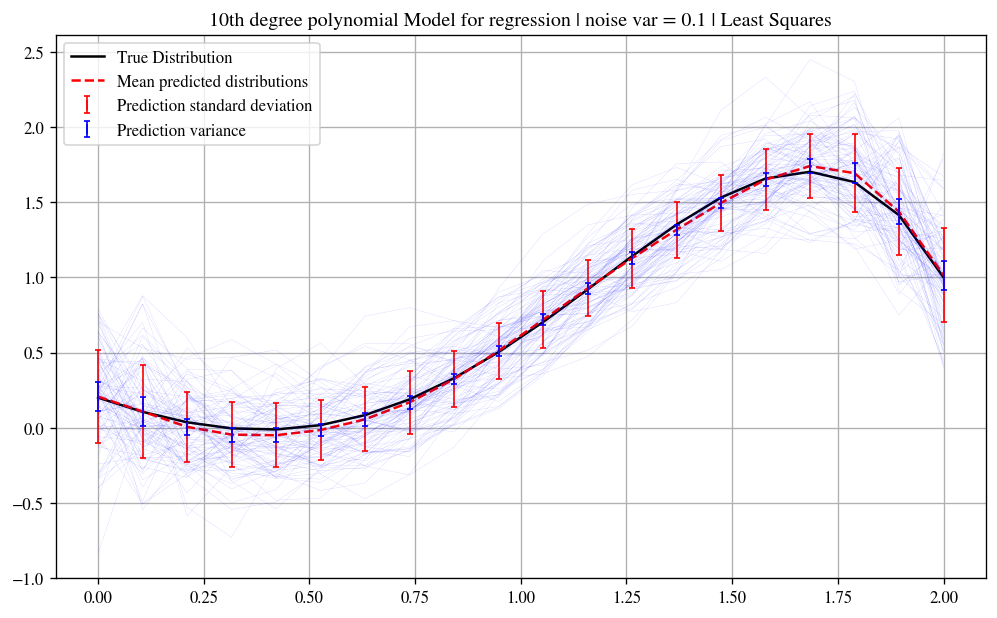

In [28]:
plt.figure(figsize=(10,6),dpi=120)
plt.grid(True)
plt.title('10th degree polynomial Model for regression | noise var = 0.1 | Least Squares')
plt.plot(X_train, y_true, color = 'black', label='True Distribution')
plt.plot(X_train, y_mean_10th, linestyle = 'dashed',color = 'red',  label='Mean predicted distributions')
for i in range(100):
  plt.plot(X_train, Y_pred_experiments_10th[i], linestyle = 'dashed',color = 'blue',  linewidth = 0.1, alpha = 0.5)
plt.errorbar(X_train, y_mean_10th, yerr=y_stds_10th, fmt='|', color='red', ecolor='red', elinewidth=1, capsize=2, label='Prediction standard deviation')
plt.errorbar(X_train, y_mean_10th, yerr=y_var_10th, fmt='|', color='blue', ecolor='blue', elinewidth=1, capsize=2, label='Prediction variance')
plt.legend()
plt.show()

We can additionally calculate the Bias and Variance of the model using the following equations:
- $Bias^2 = (E[\hat{y}] - y)^2$
- $Variance = E[(\hat{y} - E[\hat{y}])^2]$

We expresses them as the mean of their total respective components (corresponding to each observation):

In [29]:
Bias_squared_10th = ((y_mean_10th - y_true)**2)
Variance_10th = y_var_10th
print('Bias squared for the 10th degree polynomial model using least squares is:',np.mean(Bias_squared_10th))
print('Variance for the 10th degree polynomial model using least squares is:',np.mean(Variance_10th))
print('MSE for the 10th degree polynomial model using least squares is:',np.mean(Bias_squared_10th + Variance_10th))

Bias squared for the 10th degree polynomial model using least squares is: 0.0007574967394251189
Variance for the 10th degree polynomial model using least squares is: 0.05273563668103012
MSE for the 10th degree polynomial model using least squares is: 0.05349313342045524


---

### Results of Exercise 1.2:

Bias and Variance are two important concepts in machine learning that are often used to describe the performance of a model. They are related to the terms underfitting and overfitting.
- Bias explains how far off the predictions are from the true model. We need a model with low Bias to have good prediction accuracy on the test set.
- Variance explains how much the predictions vary for different training sets. We need a model with low variance as well to have good prediction accuracy on the test set.

This creates a trade-off between the two, since we cant reduce bias without increasing variance and vice versa. This stems from the mean squared error mathematical equation we presented in `1.1`: $$MSE = E[(\hat{θ} -θ_0)^2] \implies 
E[(\hat{θ} - E[\hat{θ}])^2] + (Ε[\hat{θ}] - θ_0 )^2 \implies 
var(\hat{θ}) + bias^2(\hat{θ})$$

In Exercise `1.1` we saw that the true model that generated the data is a 5th degree polynomial with the coefficient of the 4th power set to 0. 
- In `1.2` we investigated the prediction accuracy of a 2nd degree polynomial and a 10th degree polynomial model. Both models were trained using the Least Squares method which is an unbiased estimator with a training set of $N=20$ and $\sigma^2_\eta=0.1$.

As shown in the above results and as expected:
  - The 2nd degree polynomial model has fewer parameters than the true model and thus it is not able to capture the true model's complexity, this results in high bias and underfitting (The predicted distribution is almost straight line, while the true distribution a curve). However, since it has fewer parameters, thus low complexity it is not effected by the intricasies of noise in the training set and the predicted output has  low Variance for different training set.
  - The 10th degree polynomial model has more parameters than the true model, this makes it more complex and it takes into account the fine details of the noise in each training set. Thus we have a model with high variance and overfitting in the noise of the training set (The predicted line is much more "wiggly" than the true curve). However, when we average over the 100 experiments we get a much smoother curve very close to the true model, this is due to the fact that along the noise the model is able to capture the true model's complexity and thus it has low bias.

---
---

# Exercise 1.3
1)	Using , $σ_η^2=0.1$ and the structure of the correct model (5th degree polynomial with the coefficient of the 4th power equal to zero), repeat experiment 1.1, implementing the Ridge Regression method with various values of λ (instead of the Least Squares Method). Report whether you have observed an improvement of the Mean Square Error for some of the values of λ. 

### Solution

We have the generalized regression model:
- $y = \theta_0 + \theta_1 x  + \theta_2 x^2+ \theta_3 x^3 \theta_5 x^5+ η$ 

following matrix notation and incorporating $\theta_0$ into the $\Theta$ matrix, we can write the model as:  
- $Y = \Phi\Theta + \eta$, where $\Phi = \begin{bmatrix}  1 & x_1 & x_1^2 & x_1^3   & x_1^5  \\ 1 & x_2 & x_2^2 & x_2^3  & x_2^5  \\ \vdots & \vdots & \vdots & \vdots  & \vdots \\ 1 & x_n & x_n^2 & x_n^3 & x_n^5 &  \end{bmatrix}$ and 
$\Theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ \theta_3   \\  \theta_5  \end{bmatrix} = \begin{bmatrix}  0.2 \\-1 \\  0.9 \\ 0.7 \\  -0.2  \end{bmatrix}$

In [30]:
import numpy as np 
#Random seed for reproducibility
np.random.seed(1000)

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Plot fonts
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family']      = 'STIXGeneral'

In [31]:
theta_true = np.array([ 0.2,-1, 0.9, 0.7, -0.2])
print(theta_true)

[ 0.2 -1.   0.9  0.7 -0.2]


We also require a constructor for the $Φ$ matrix:

In [32]:
# A function that takes as input training points and returns the Phi Matrix
def get_Phi_matrix(x):
  Phi =[]
  for i in range(len(x)):
    #Create the structure of the model and 1 to account for theta_0
    Phi.append([1,x[i], x[i]**2, x[i]**3, x[i]**5])
  return np.array(Phi)

#### We create in steps the functionality of a Generalized Linear Regression model.
That will be able to carry out the tasks required for this excercise: 
1. As in 1.1
2. Estimation of the parameter vector via training with input output pairs using Ridge regression. We can train our generalized linear regression model by using the training $x$ inputs , $y$ output pairs we created with the generator, by using the least squares method in matrix form and augmenting it by adding an identity matrix multipled by a scalar λ: $$\theta_{RR}=(\Phi^T \Phi + λI)^{-1}\Phi^Ty $$ to find the optimal parameter vector: $\theta_{RR}$. Essentially, $λI$ works as additional bias in our initial generalized LS model.
3. As in 1.1
4. As in 1.1



To reduce computation time, the class implemented in 1.1 was not used in 1.3.

We consider $N$ equidistant points $x_1,x_2,...,x_n$ in the interval $[0,2]$ and
use them to create samples for our training set, we can generate these points using:

In [33]:
start = 0
end = 2
N_train = 20
N_test = 1000

import math

#N equidistant points for x 
x_train = np.linspace(start, end, N_train)

#The corresponding Phi matrix generated is:
Phi_train = get_Phi_matrix(x_train)

Lambda_range = np.linspace(0, 0.25, 50 + 1)

iterations = 1000

MSE_train = []
MSE_test = []

# runs through all the lambdas that were generated
for Lambda_coef in Lambda_range:
    MSE_total_train = 0
    MSE_total_test = 0

    # runs through all iterations for a specific lambda, calculating the average MSE
    for _ in range(iterations):
        #We now compute the model outcome for each training point passing in the theta_true parameters
        y_train = np.dot(Phi_train, theta_true) + np.random.normal(0, math.sqrt(0.1), N_train)

        #The above equation to train and find the optimal parameter vector is:
        theta_RR = np.dot((np.dot(np.linalg.inv(np.dot(Phi_train.T, Phi_train) + Lambda_coef * np.diag(np.ones(Phi_train.shape[1]), 0)), Phi_train.T)), y_train)

        MSE_total_train += ((np.dot(Phi_train, theta_RR) - y_train)**2).mean()

        # calculates MSE for (N_test) uniformly chosen data points
        x_test = np.random.uniform(start, end, N_test)
        Phi_test = get_Phi_matrix(x_test)

        y_test = np.dot(Phi_test, theta_true) + np.random.normal(0, math.sqrt(0.1), N_test)
        MSE_total_test += ((np.dot(Phi_test, theta_RR) - y_test)**2).mean()

    MSE_train.append(MSE_total_train/iterations)
    MSE_test.append(MSE_total_test/iterations)

    print(f"{Lambda_coef}")

0.0
0.005
0.01
0.015
0.02
0.025
0.03
0.035
0.04
0.045
0.05
0.055
0.06
0.065
0.07
0.075
0.08
0.085
0.09
0.095
0.1
0.105
0.11
0.115
0.12
0.125
0.13
0.135
0.14
0.145
0.15
0.155
0.16
0.165
0.17
0.17500000000000002
0.18
0.185
0.19
0.195
0.2
0.20500000000000002
0.21
0.215
0.22
0.225
0.23
0.23500000000000001
0.24
0.245
0.25


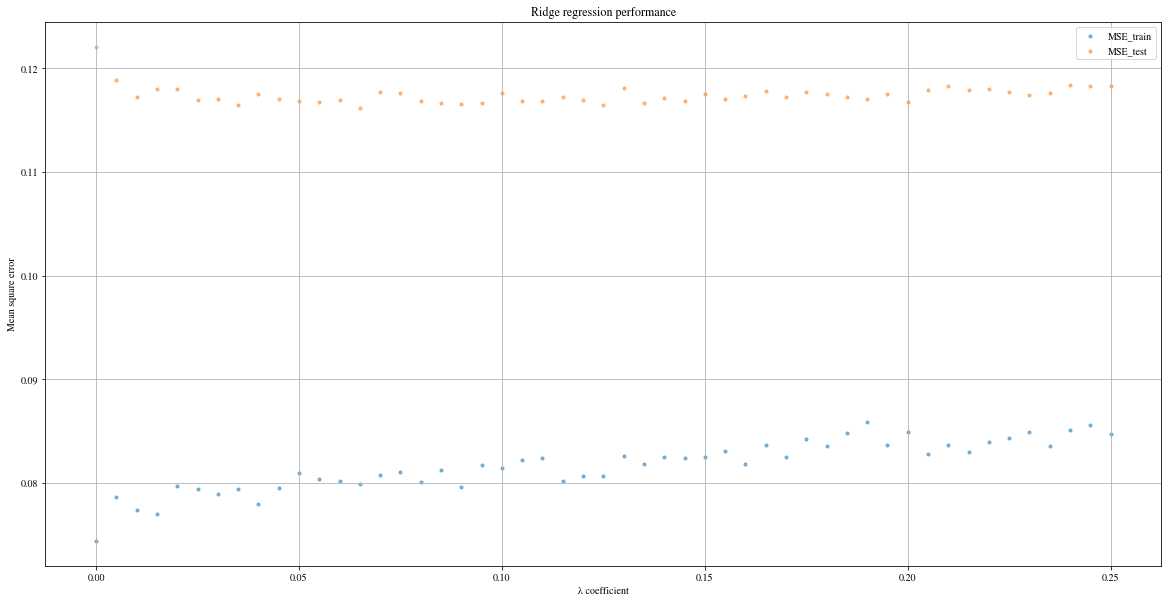

0.11692849098898198, min: 0.1162008512377761, max: 0.12209130336764656, λ_min: 0.065


In [34]:
plt.figure(figsize=(20,10))
plt.scatter(   
            Lambda_range, 
            MSE_train, 
            marker = "o", 
            s=10, 
            alpha=0.50
        )
plt.scatter(   
            Lambda_range, 
            MSE_test,
            marker = "o", 
            s=10, 
            alpha=0.50
        )
plt.xlabel("λ coefficient")
plt.ylabel("Mean square error")

plt.legend(["MSE_train", "MSE_test"])
plt.title(f"Ridge regression performance")
plt.grid()
plt.show()

dist = Lambda_range[1]

arr_start = 0.06
arr_end = 0.13

print(f"{np.array(MSE_test)[int(arr_start/dist): int(arr_end/dist)].mean()}, min: {np.array(MSE_test).min()}, max: {np.array(MSE_test).max()}, λ_min: {dist * np.array(MSE_test).argmin()}")

Observations:
- Due to added bias in the RR curve, MSE_train is actually increasing, due to the RR curve being increasing unfit for the training data, compared to the LS curve.
- Both training set and test set MSEs are increasing; at around λ = 50, MSE_train > MSE_test, although that is a highly impractical λ.
- A valley of low MSE emerges for the test data. After exhaustive (= 200000) iterations, it was estimated that minimum MSE is achieved for λ =~ 0.085, MSE(0.085) =~ 0.11668.
- In reality, any λ between [0.06, 0.13] will work.

We can plot the training set predictions and the true values to see how well our model fits the data:

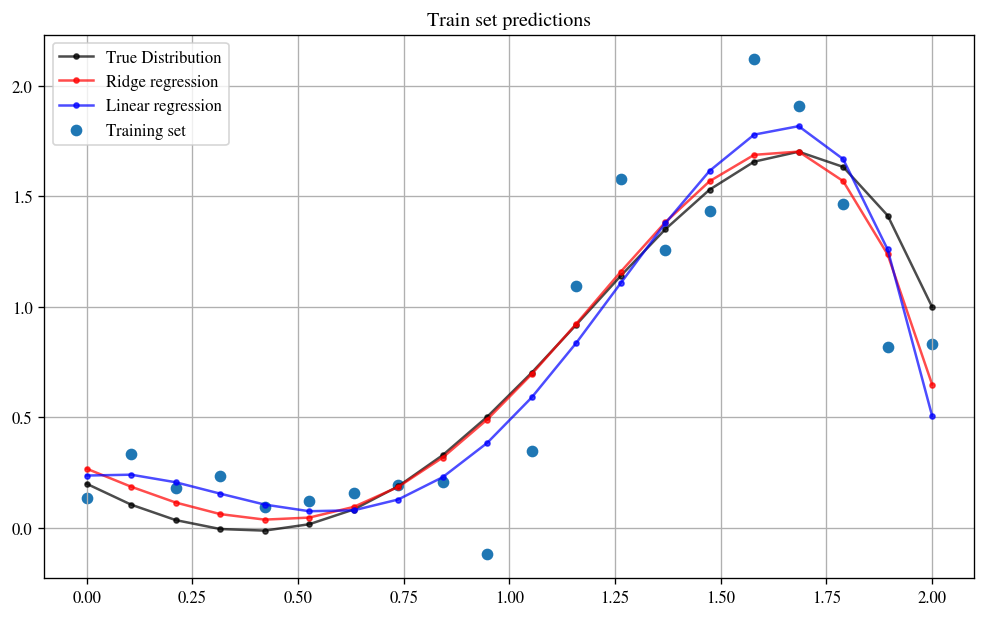

In [35]:
plt.figure(figsize=(10,6),dpi=120)
plt.grid(True)
plt.title('Train set predictions')
plt.scatter(x_train,y_train, 
            label='Training set')
plt.plot(x_train, Phi_train @ theta_true, 
            color = 'black', marker='.', 
            label='True Distribution' , alpha = 0.7)
            
# After tests, it was found that minimum MSE_test is achieved at a region between 0.06 and 0.13
theta_RR = np.dot((np.dot(np.linalg.inv(np.dot(Phi_train.T, Phi_train) + 0.085 * np.diag(np.ones(Phi_train.shape[1]), 0)), Phi_train.T)), y_train)

plt.plot(x_train, Phi_train @ theta_RR, 
            color = 'red', marker='.', 
            label='Ridge regression' , alpha = 0.7)

theta_LS = np.dot((np.dot(np.linalg.inv(np.dot(Phi_train.T, Phi_train) + 0 * np.diag(np.ones(Phi_train.shape[1]), 0)), Phi_train.T)), y_train)
plt.plot(x_train, Phi_train @ theta_LS, 
            color = 'blue', marker='.', 
            label='Linear regression' , alpha = 0.7)


plt.legend()
plt.show()

It is evident that, due to added bias, the RR curve will be different than the LS one.

We can plot the testing set predictions and the true values to see how well our model fits the data:

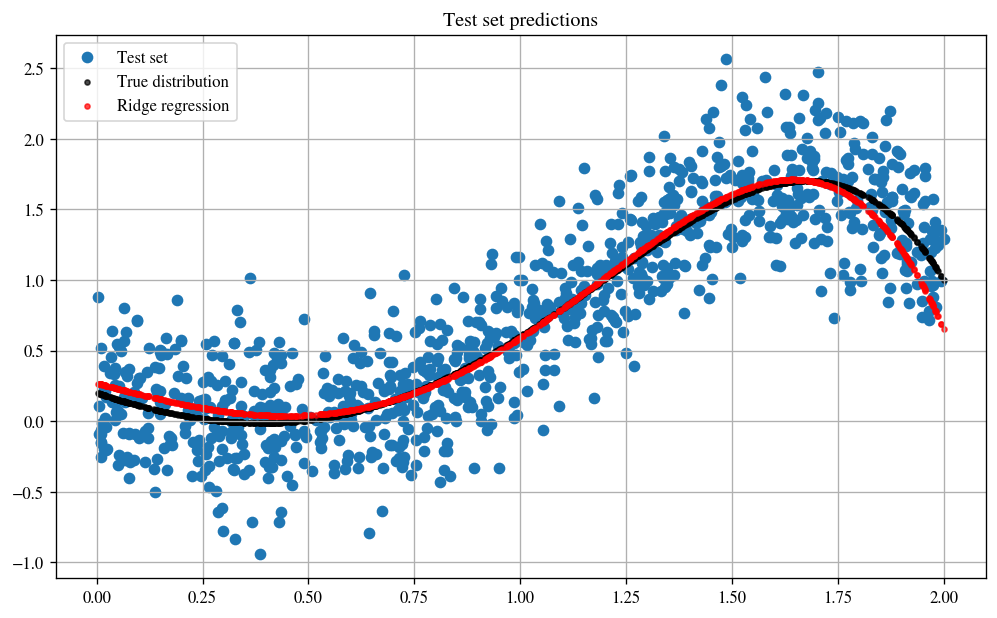

In [36]:
plt.figure(figsize=(10,6),dpi=120)
plt.grid(True)
plt.title('Test set predictions')
plt.scatter( x_test, y_test, label='Test set')
plt.scatter( x_test, Phi_test@theta_true, color = 'black',marker='.', label='True distribution' , alpha = 0.7)
plt.scatter( x_test, Phi_test@theta_RR, color = 'red',marker='.', label='Ridge regression' , alpha = 0.7)
plt.legend()
plt.show()

### Results of Exercise 1.3:

#### MSE over the training set and test set, results:
Although the difference between the MSE of the training set and the test set was reduced, compared to 1.1, it still exists, due to overfitting.
- small training set of 20 points, which is not enough to capture the true underlying true distribution.
- implementation of ridge regression; the model is de-sensitized to the particular noise pattern present in the training set and will overfit less than when unbiased generalized linear regression is utilized.


---
---

# Exercise 1.4
We encode our prior knowledge for the unknown parameter vector via a Gaussian distribution $G(θ)$ with mean equal to $θ_0$ the true parameter vector $\begin{bmatrix}0.2 & -1 & 0.9 & 0.7 &  -0.2  \end{bmatrix}^T$ and covariance matrix $Σ_θ=σ_θ^2 Ι,σ_θ^2=0.1$ . Use the structure of the true model ($y=0.2 -1x +  0.9x^2  -0.2x^3 + 0.2x^5$) and perform full Bayesian Inference in order to evaluate y for 20 randomly selected test set points belonging to the interval [0,2] and for two different values of $σ^2_{\eta}$ (0.05 and 0.15). Plot your estimates and their errors on the (x,y) plane. 

### Solution 




Since the Noise is Gausian white $\sim N(0,σ_\eta^2)$: 
- The prior probability distribution is Gaussian: $G(θ) = p(\theta_0) \sim  N(θ_0 , σ_\theta^2 Ι)$

- The posterior probability distribution is Gaussian: $p(θ|y) \sim N(\mu_{\theta|y}, \Sigma_{\theta|y} )$ 

- To perform full Bayesian inference of the output variable $y$ we need to find $p(y|\textbf{y}) \sim N(\mu_y,\sigma^2_y)$ where $\textbf{y}$ is the vector of output observations.


The parameters of the prior distribution are given, however we need to compute the mean of the posterior distribution $\mu_{\theta|y}$ which we will utilize to compute the mean $\mu_y$ of $p(y|\textbf{y})$.
- The mean of the posterior distribution are given by the result of the Maximum A Posteriori (MAP) estimation $argmax_{\theta}p(y|\theta)p(\theta)$: 

    $$\theta_0 + (\Sigma^{-1}_\theta + \Phi^T \Sigma^{-1}_\eta \Phi)^{-1}Phi^T  \Sigma^{-1}_\eta (\textbf{y} - \Phi\theta_0)$$
    
    - Since  $\Sigma_\eta = \sigma_\eta^2 \mathbf{I}$ and $\Sigma_\theta = \sigma_\theta^2 \mathbf{I}$ (white Gaussian noise case) we can compute the mean of the posterior distribution as follows:
  $$ \mu_{\theta|y} = \theta_{MAP} = \theta_0 + \frac{1}{\sigma^2_\eta}(\frac{1}{\sigma^2_\theta}I + \frac{1}{\sigma^2_\eta} \Phi^T\Phi)^{-1} \Phi^T(\textbf{y} - \Phi\theta_0)$$  


We pass this equation into a function to be able to compute the mean of the posterior distribution for different values of $\sigma^2_\eta,\sigma^2_\theta,\theta_0$ as well as input observations $\Phi$ and output observations $\textbf{y}$ and enrich our model class `GeneralizedLinearRegression` created in `1.1` by adding a  $MAP$ training method. 

In [37]:
class GeneralizedLinearRegression:
  def __init__(self):
    self.theta = None

  #1.Generalized white gausian linear regression generator with 5th degree polynomial with the coefficient of the 4th power equal to zero.  
  def generate(self,Phi,theta,sigma_eta):
      #Numpy normal takes as input mean and standard deviation = sqrt(variance)
      noise = np.random.normal(0, np.sqrt(sigma_eta), Phi.shape[0])
      return np.dot(Phi,theta) + noise
    
  #2.Training function, with the Least squares method 
  def train_LS(self,Phi_train,y_train, verbose = False):
        self.theta = np.dot((np.dot(np.linalg.inv(np.dot(Phi_train.T, Phi_train)), Phi_train.T)), y_train)
        if verbose:
          print('With the LS method the optimal parameter vector is',self.theta)
        return self.theta

  #3.Training function, with the Maximum a posteriori method (MAP) <----- This is the new training method added
  def train_MAP(self,Phi_train,y_train,theta_0,sigma_eta,sigma_theta, verbose = False):
        I = np.eye(theta_0.shape[0])
        self.theta = theta_0 + (1 / sigma_eta) * np.linalg.inv(1 / sigma_theta * I + 1 / sigma_eta * Phi_train.T @ Phi_train) @ Phi_train.T @ (y_train - Phi_train @ theta_0)
        if verbose:
          print('With the MAP method the optimal parameter vector is:',self.theta)
        return self.theta

  #4.Generalized linear regression predictor with 5th degree polynomial with the coefficient of the 4th power equal to zero.
  def predict(self, Phi):
        return np.dot(Phi,self.theta) 

  #5.b Predictor MSE evaluation  
  def evaluate(self,y_pred,y_true, verbose = False):
    if verbose:
      print('predictions are:\n',y_pred)
      print('true y values are:\n',y_true)
      print(f'Calculating predictor MSE: 1/{len(y_true)}*(y_pred-y_true).T,(y_pred-t_true))')
    return (1/len(y_true))* np.dot((y_pred-y_true).T,(y_pred-y_true))

In the case of white Gussian noise the variance of $p(y|\textbf{y})$ is given by:

  $$\sigma^2_{yi} = \sigma^2_\eta + \sigma^2_\eta\sigma^2_\theta\Phi(i)^T (\sigma^2_\eta I + \sigma^2_\theta\Phi^T\Phi)^{-1} \Phi(i)$$

Just like before we pass this knowledge into two function for the same reason as above:

In [38]:
#We compute the mean with full bayesian inference.
def calc_mu_y(theta_Map, Phi):
  # this returns the mean of the output obserations given each the observation rows in Phi
  return Phi @ theta_Map

#We compute the variance of the bayesian inference.
def calc_sigma_y1(theta_0,sigma_theta,sigma_eta,Phi):
  simga_y = []
  I = np.eye(theta_0.shape[0])
  #We iterate over the rows of Phi to find the variance for each output observation.
  for i in range(Phi.shape[0]):
    simga_y.append(sigma_eta + sigma_eta * sigma_theta * Phi[i,:].T @ np.linalg.inv(sigma_eta * I + sigma_theta * Phi.T @ Phi) @ Phi[i,:])
  return np.array(simga_y)

Before making predictions using the two different values of $\sigma^2_\eta$ we need to generate the input observations $\Phi$. We do this by generating 20 random points in the interval [0,2] and then we compute the corresponding $\Phi$ matrix. Additonally we  pass the known parameters of the prior distribution to their corresponding varibales in order to ues them as function arguments:

In [39]:
# We generate the test data
X_test = np.linspace(0,2,20)
# We constrict the Phi matrix for the test data
Phi_test = get_Phi_matrix(X_test)


# prior mean = true 
theta_0 = np.array([0.2,-1, 0.9, 0.7, -0.2]).T
sigma_theta_1 = 0.1

Moving on we solve the problem for two different values of $\sigma^2_\eta: 0.05 \ and \ 0.15.$
We call two isntances of our model `GeneralizedLinearRegression` to generate the output labels $\textbf{y}$ for the two white noise cases:

In [40]:
model_1 = GeneralizedLinearRegression()
model_2 = GeneralizedLinearRegression()

#### For $\sigma^2_\eta = 0.05$ 
  - We make predidictions for the 20 test points using the true model and plot them along with their errors corresponding to $\sigma^2_y$ on the (x,y) plane.
  - we compute the mean of the posterior distribution $\mu_{\theta|y} = \theta_{MAP}$ and the mean of the output variable $\mu_y$ as well as the variance of the output variable $\sigma^2_y$.

True parameter vector =  [ 0.2 -1.   0.9  0.7 -0.2]
Estimated parameter vector =  [ 0.15558228 -0.9322058   0.95581592  0.67024003 -0.19943985]
MSE score is: 0.003917854860658146


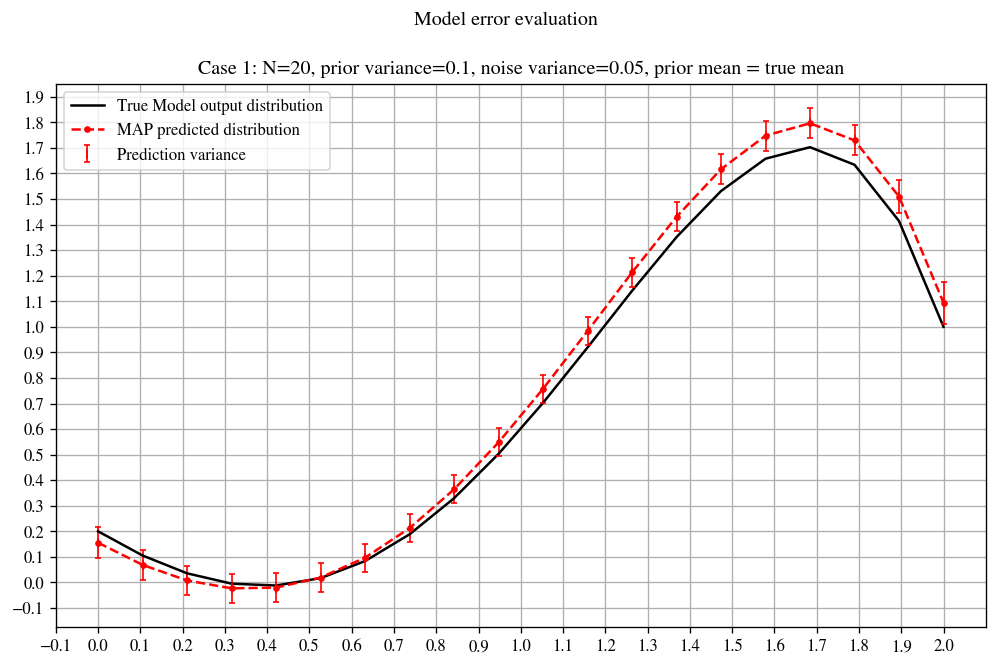

In [41]:
# pass the noise variance
sigma_eta = 0.05

# We make predictions on the test data using the true parameters without noise
y_true_1 = np.dot(Phi_test,theta_0)

# We generate the training data using the linear_regression_predict function with the true parameters and the noise variance sigma_eta = 0.05
y_train_1 = model_1.generate(Phi_test, theta_0,sigma_eta = 0.05)

# We compute the MAP estimate of theta
theta_map_1 =  model_1.train_MAP(Phi_test,y_train_1,theta_0,sigma_eta, sigma_theta_1)

#We make the predictions with the MAP estimate of theta 
y_pred_1 = model_1.predict(Phi_test)

mu_y_1 = calc_mu_y(theta_map_1, Phi_test)

# we compute the variance of the output observations given the observations
sigma_y_1 = calc_sigma_y1(theta_0,sigma_theta_1,sigma_eta,Phi_test)

print('True parameter vector = ', theta_0)
print('Estimated parameter vector = ', theta_map_1)
print('MSE score is:',model_1.evaluate(y_pred_1,y_true_1))

# We plot the results
plt.figure(figsize=(10, 6),dpi=120)
plt.grid(True)
plt.xticks(np.arange(-0.1, 2.1, step=0.1))
plt.yticks(np.arange(-0.2, 2.1, step=0.1))
plt.suptitle('Model error evaluation')
plt.title('Case 1: N=20, prior variance=0.1, noise variance=0.05, prior mean = true mean')
plt.plot(X_test, y_true_1, color = 'black')
plt.plot(X_test, y_pred_1,linestyle = 'dashed', marker = '.' , color = 'red')
plt.errorbar(X_test, y_pred_1, yerr=sigma_y_1, fmt='|', color='red', ecolor='red', elinewidth=1, capsize=2)
plt.legend(['True Model output distribution', 'MAP predicted distribution','Prediction variance'])
plt.show()

#### For $\sigma^2_\eta = 0.15$ 
  - We make predidictions for the 20 test points using the true model and plot them along with their errors corresponding to $\sigma^2_y$ on the (x,y) plane.
  - we compute the mean of the posterior distribution $\mu_{\theta|y} = \theta_{MAP}$ and the mean of the output variable $\mu_y$ as well as the variance of the output variable $\sigma^2_y$.

True parameter vector =  [ 0.2 -1.   0.9  0.7 -0.2]
Estimated parameter vector =  [ 0.29896026 -0.95998388  0.95927279  0.72337548 -0.21931074]
MSE score is: 0.027929391990146542


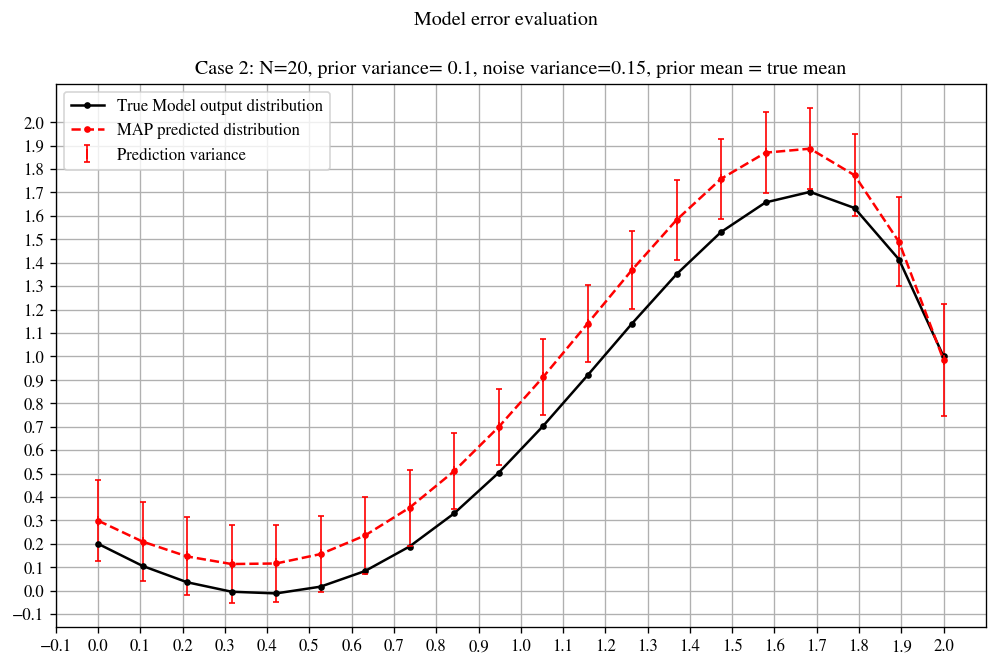

In [42]:
sigma_eta_2 = 0.15
# We make predictions on the test data using the true parameters
y_true_2 = np.dot(Phi_test,theta_0)

# We generate the test data using the linear_regression_predict function with the true parameters and the noise variance sigma_eta = 0.05
y_train_2 = model_2.generate(Phi_test, theta_0,sigma_eta=sigma_eta_2)

# We compute the MAP estimate of theta
theta_map_2 =  model_2.train_MAP(Phi_test,y_train_2,theta_0,sigma_theta_1,sigma_eta_2)

#We make the predictions with the MAP estimate of theta
y_pred_2 = model_2.predict(Phi_test)

mu_y_2 = calc_mu_y(theta_map_2, Phi_test)

# we compute the variance of the output observations given the observations
sigma_y_2 = calc_sigma_y1(theta_0,sigma_theta_1,sigma_eta_2,Phi_test)

print('True parameter vector = ', theta_0)
print('Estimated parameter vector = ', theta_map_2)
print('MSE score is:',model_1.evaluate(y_pred_2,y_true_2))


# We plot the results
plt.figure(figsize=(10, 6),dpi=120)
plt.grid(True)
plt.xticks(np.arange(-0.1, 2.1, step=0.1))
plt.yticks(np.arange(-0.2, 2.1, step=0.1))
plt.suptitle('Model error evaluation')
plt.title('Case 2: N=20, prior variance= 0.1, noise variance=0.15, prior mean = true mean')
plt.plot(X_test, y_true_2,marker = '.', color = 'black')
plt.plot(X_test, y_pred_2,linestyle = 'dashed', marker = '.' , color = 'red')
plt.errorbar(X_test, y_pred_2, yerr=sigma_y_2, fmt='|', color='red', ecolor='red', elinewidth=1, capsize=2)
plt.legend(['True Model output distribution', 'MAP predicted distribution','Prediction variance'])
plt.show()

---

### Results of Exercise 1.4:
In both case the mean of the prior distributin is equal to the true parameter vector $\theta_0$ and the training set is small $N = 20$, since the training set is small our prior kowledge (depending on its distribution variance) can play an important role.
- In the first case the variance of the prior distribution is smaller than the variance of the noise $\sigma^2_\eta$. Thus the posterior distribution is more concentrated around the true parameter vector $\theta_0$ and the possible error is smaller.

- On the contrary in the second case the variance of the prior distribution is larger than the variance of the noise $\sigma^2_\eta$. Thus the posterior distribution is more spread out making its regularazing effect weak and since we have a small training set our uncertainty/error larger.

In both cases via Bayesian inference we are able to quantify the said error/uncertainty of each of our prediction for each of the 20 input points with the help of the variance of the output variable $\sigma^2_y$.

---
---

# Exercise 1.5
Repeat experiment (4) using the following mean vector for $ G(θ): θ_0=[-10.54,0.465,0.0087,-0.093,-0.004]^T$
With  $\sigma^2_\eta=0.05$. 
Perform the experiment four times, using two different values for:
$\sigma_\theta = (0.1 \ and  \ 2)$ 
$ N= (20 \  and \ 500)$. 
Comment on your results

### Solution

To solve this problem we utilize our Gneralized Linear Regression model built in `1.1` and update with the Map training method in `1.4`.

In [43]:
# We create instances of the class for the four different cases
model_3 = GeneralizedLinearRegression()
model_4 = GeneralizedLinearRegression()
model_5 = GeneralizedLinearRegression()
model_6 = GeneralizedLinearRegression()

We already have a $\Phi$ matrix for $N=20$ points `Phi_test`, so we  generate an additional $\Phi$ matrix for $N=500$ points and pass the known problem parameters to their corresponding variables in order to use them as function arguments.

In [44]:
# We generate the 500 points for the test data
X_test_2 = np.linspace(0,2,500)
# We constrict the two Phi matrices from the test data
Phi_test_2 = get_Phi_matrix(X_test_2)


#Noise variance
sigma_eta = 0.05

# prior parameter vector
theta_zero = np.array([-10.54, 0.465, 0.0087, -0.093, -0.004]).T

#True parameter vector
theta_true  = np.array([0.2, -1, 0.9, 0.7, -0.2]).T

For $N = 20$, $N=500$ we create the test output using the true model and we generate the training test using $\sigma_\eta = 0.05$  to use for the MAP train method:

In [45]:
#Find the true outputs using the true parameters
y_true_20 = np.dot(Phi_test,theta_true)
y_true_500 = np.dot(Phi_test_2,theta_true)

#Gnerate the training set using noise = 0.05
y_train_20 = model_3.generate(Phi_test,theta_true,sigma_eta)
y_train_500 = model_4.generate(Phi_test_2,theta_true,sigma_eta)

#### For $\sigma^2_\theta = 0.1 , N = 20 , θ_0=[-10.54,0.465,0.0087,-0.093,-0.004] $ we train the model and make predictions for the 20 test points using the true model and plot them along with their errors corresponding to $\sigma^2_y$ on the (x,y) plane.

True parameter vector  [-1.054e+01  4.650e-01  8.700e-03 -9.300e-02 -4.000e-03]
Estimated parameter vector  [-1.28575162  1.7888232   0.33851213 -0.00297151 -0.08421983]
MSE score is: 0.27391429822592106


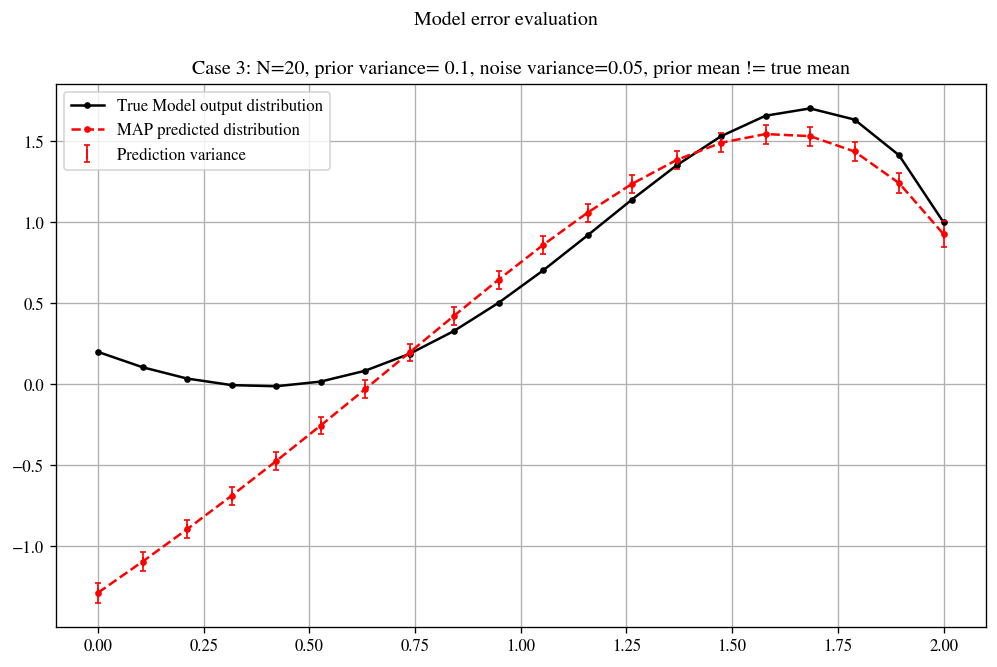

In [46]:
sigma_theta_3 = 0.1

# We compute the MAP estimate of theta
theta_map_3 =  model_3.train_MAP(Phi_test,y_train_20,theta_zero,sigma_eta,sigma_theta_3)

#We make the predictions with the MAP estimate of theta
y_pred_3  = model_3.predict(Phi_test)

mu_y_3 = calc_mu_y(theta_map_3, Phi_test)

# we compute the variance of the output observations given the observations
sigma_y_3 = calc_sigma_y1(theta_zero,sigma_theta_3,sigma_eta,Phi_test)

print('True parameter vector ',theta_zero)
print('Estimated parameter vector ',theta_map_3)
print('MSE score is:', model_3.evaluate(y_pred_3,y_true_20))

# We plot the results
plt.figure(figsize=(10, 6),dpi=120)
plt.grid(True)
plt.suptitle('Model error evaluation')
plt.title('Case 3: N=20, prior variance= 0.1, noise variance=0.05, prior mean != true mean')
plt.plot(X_test, y_true_20, marker = '.', color = 'black')
plt.plot(X_test, y_pred_3,linestyle = 'dashed', marker = '.' , color = 'red')
plt.errorbar(X_test, y_pred_3, yerr=sigma_y_3, fmt='|', color='red', ecolor='red', elinewidth=1, capsize=2)
plt.legend(['True Model output distribution', 'MAP predicted distribution','Prediction variance'])
plt.show() 

---


#### For $\sigma^2_\theta = 2, N = 20 , θ_0=[-10.54,0.465,0.0087,-0.093,-0.004] $ we train the model and make predictions for the 20 test points using the true model and plot them along with their errors corresponding to $\sigma^2_y$ on the (x,y) plane.


True parameter vector  [-1.054e+01  4.650e-01  8.700e-03 -9.300e-02 -4.000e-03]
Estimated parameter vector  [-0.02295782 -0.41158394  0.66543776  0.61145529 -0.18335657]
MSE score is: 0.009298649092098479


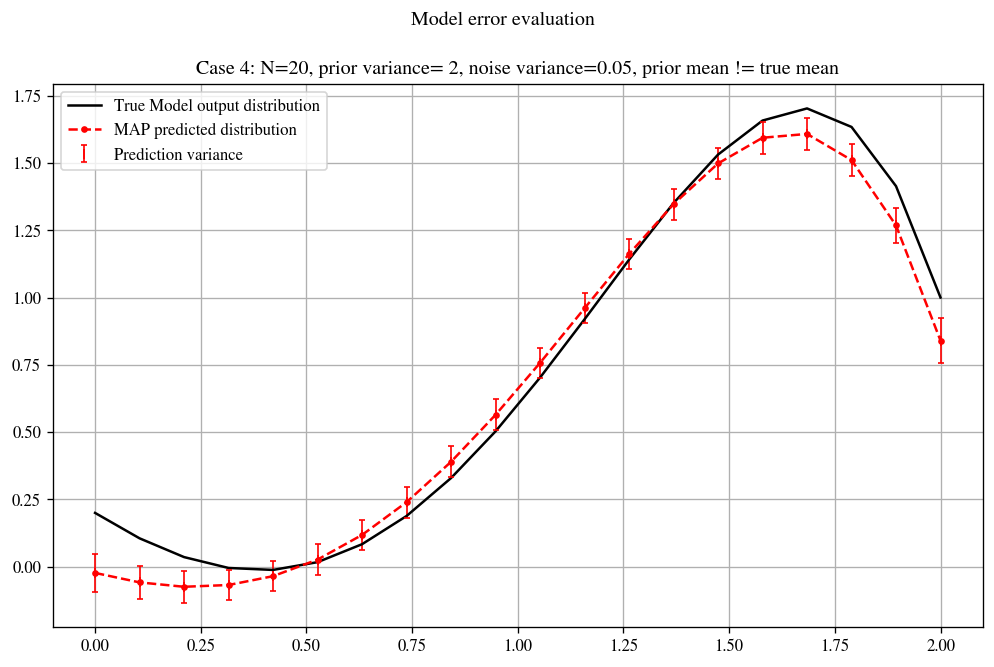

In [47]:
sigma_theta_4 = 2

# We compute the MAP estimate of theta
theta_map_4 =  model_4.train_MAP(Phi_test,y_train_20,theta_zero,sigma_eta,sigma_theta_4)

#We make the predictions with the MAP estimate of theta
y_pred_4 = model_4.predict(Phi_test)

mu_y_4 = calc_mu_y(theta_map_4, Phi_test)

# we compute the variance of the output observations given the observations
sigma_y_4 = calc_sigma_y1(theta_zero,sigma_theta_4,sigma_eta,Phi_test)

print('True parameter vector ',theta_zero)
print('Estimated parameter vector ',theta_map_4)
print('MSE score is:', model_4.evaluate(y_pred_4,y_true_20))

# We plot the results
plt.figure(figsize=(10, 6),dpi=120)
plt.grid(True)
plt.suptitle('Model error evaluation')
plt.title('Case 4: N=20, prior variance= 2, noise variance=0.05, prior mean != true mean')
plt.plot(X_test, y_true_20, color = 'black')
plt.plot(X_test, y_pred_4,linestyle = 'dashed', marker = '.' , color = 'red')
plt.errorbar(X_test, y_pred_4, yerr=sigma_y_4, fmt='|', color='red', ecolor='red', elinewidth=1, capsize=2)
plt.legend(['True Model output distribution', 'MAP predicted distribution','Prediction variance'])
plt.show()

#### For $\sigma^2_\theta = 0.1, N = 500 , θ_0=[-10.54,0.465,0.0087,-0.093,-0.004] $ we train the model and make predictions for the 20 test points using the true model and plot them along with their errors corresponding to $\sigma^2_y$ on the (x,y) plane.

True parameter vector  [-1.054e+01  4.650e-01  8.700e-03 -9.300e-02 -4.000e-03]
Estimated parameter vector  [ 0.01379191 -0.24668856  0.20286491  0.84603524 -0.18705794]
MSE score is: 0.0028334257367240304


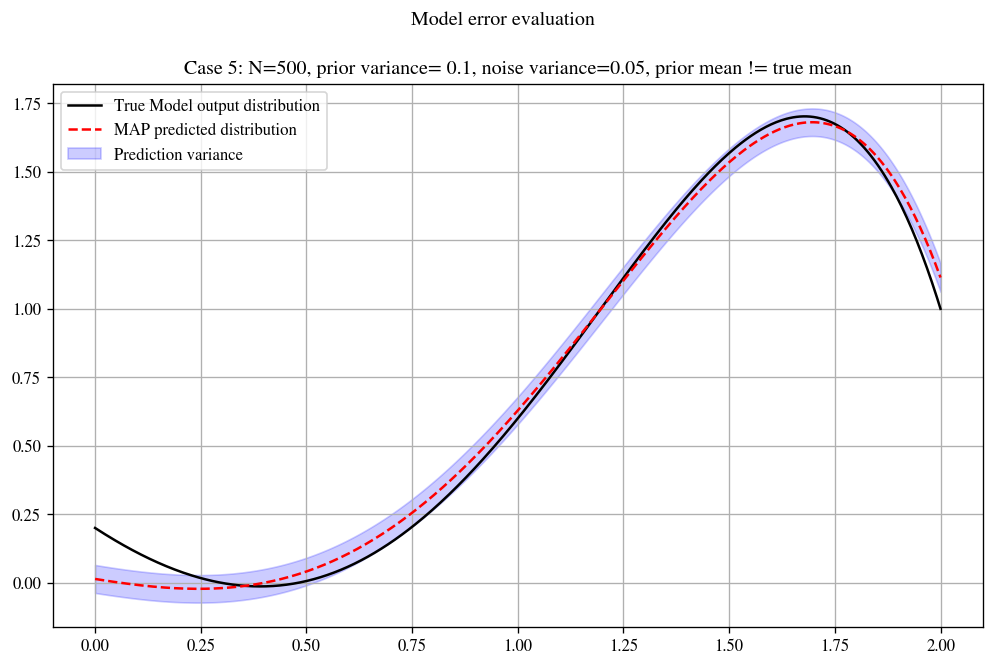

In [48]:
sigma_theta_3 = 0.1
# We compute the MAP estimate of theta
theta_map_5 =  model_5.train_MAP(Phi_test_2,y_train_500,theta_zero,sigma_eta,sigma_theta_3)

#We make the predictions with the MAP estimate of theta
y_pred_5 = model_5.predict(Phi_test_2)

mu_y_5 = calc_mu_y(theta_map_5, Phi_test)

# we compute the variance of the output observations given the observations
sigma_y_5 = calc_sigma_y1(theta_zero,sigma_theta_3,sigma_eta,Phi_test_2)

print('True parameter vector ',theta_zero)
print('Estimated parameter vector ',theta_map_5)
print('MSE score is:', model_5.evaluate(y_pred_5,y_true_500))

# We plot the results
plt.figure(figsize=(10, 6),dpi=120)
plt.grid(True)
plt.suptitle('Model error evaluation')
plt.title('Case 5: N=500, prior variance= 0.1, noise variance=0.05, prior mean != true mean')
plt.plot(X_test_2, y_true_500, color = 'black')
plt.plot(X_test_2, y_pred_5,linestyle = 'dashed' , color = 'red')
#Utilize fill_between to plot the variance of the error rather than the error bars because of the large number of points
plt.fill_between(X_test_2, y_pred_5 - sigma_y_5, y_pred_5 + sigma_y_5, color='blue', alpha=0.2)
plt.legend(['True Model output distribution', 'MAP predicted distribution','Prediction variance'])
plt.show()

#### For $\sigma^2_\theta = 2, N = 500 , θ_0=[-10.54,0.465,0.0087,-0.093,-0.004] $ we train the model and make predictions for the 20 test points using the true model and plot them along with their errors corresponding to $\sigma^2_y$ on the (x,y) plane.

True parameter vector  [-1.054e+01  4.650e-01  8.700e-03 -9.300e-02 -4.000e-03]
Estimated parameter vector  [ 0.24765531 -1.42693623  1.85875533  0.08864899 -0.13772938]
MSE score is: 0.000825107859906304


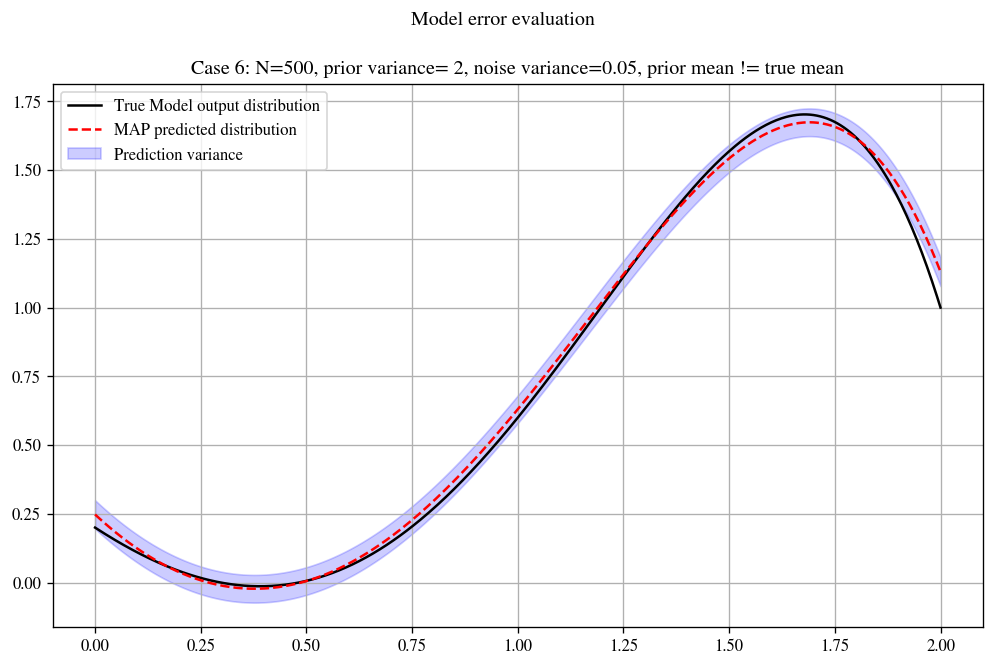

In [49]:
sigma_theta_4 = 2
# We compute the MAP estimate of theta
theta_map_6 =  model_6.train_MAP(Phi_test_2,y_train_500,theta_zero,sigma_eta,sigma_theta_4)

#We make the predictions with the MAP estimate of theta
y_pred_6 = model_6.predict(Phi_test_2)

mu_y_6 = calc_mu_y(theta_map_5, Phi_test)

# we compute the variance of the output observations given the observations
sigma_y_6 = calc_sigma_y1(theta_zero,sigma_theta_4,sigma_eta,Phi_test_2)

print('True parameter vector ',theta_zero)
print('Estimated parameter vector ',theta_map_6)
print('MSE score is:', model_6.evaluate(y_pred_6,y_true_500))

# We plot the results
plt.figure(figsize=(10, 6),dpi=120)
plt.grid(True)
plt.suptitle('Model error evaluation')
plt.title('Case 6: N=500, prior variance= 2, noise variance=0.05, prior mean != true mean')
plt.plot(X_test_2, y_true_500, color = 'black')
plt.plot(X_test_2, y_pred_6,linestyle = 'dashed' , color = 'red')
#Utilize fill_between to plot the variance of the error rather than the error bars because of the large number of points
plt.fill_between(X_test_2, y_pred_6 - sigma_y_6, y_pred_6 + sigma_y_6, color='blue', alpha=0.2)
plt.legend(['True Model output distribution', 'MAP predicted distribution','Prediction variance'])
plt.show()

---

### Results of Exercise 1.5:

When we take into account our prior knowledge for the parameter vector of the problem, it's importance in the etimation of the parameter Vector with the MAP method lies on how certain we are about it. This information is captured by the variance $\sigma^2_\theta$ of the prior distribution compared to variance of the noise $\sigma^2_\eta$.
- The higher the variance, the more spread out the prior distribution is and its regularazation/importance on the potserior distribution is larger. Thus we value the $theta_0$ parameter vector much more in our MAP estimation. 
- The lower the variance, the more compact the prior disttibution is and its reguralazation/importance on the posterior distribution is smaller. Thus  we value te $\theta_0$ paremeter vector less. 
- The Size of the training set also plays an important role, as a big training set makes us more certain on our posterior distrubution of the parameter vector. 


In Problem 1.5 , the prior parameter vector:  $θ_0=[-10.54,0.465,0.0087,-0.093,-0.004]^T$ is much different than the true vector:  $\theta_{true} = \begin{bmatrix}0.2 & -1 & 0.9 & 0.7 &  -0.2  \end{bmatrix}^T$ and the noise variance is small $\sigma^2_\eta = 0.05$.
- In case 3, for $\sigma^2_\theta = 0.1 , N = 20$: We have a small training set and a compact prior distribution with high regularazing strenght. Thus more  Importance is given on the prior distribution than the posterior resulting in wrong predictions.
- In case 4, for $\sigma^2_\theta = 2 , N = 20$: We have a small training set and a spread out prior distribution with low regularazing strenght. Thus more Importance is given on the posterior distribution than the prior resulting in better predictions.
- In case 5, for $\sigma^2_\theta = 0.1 , N = 500$: We have a big training set and a compact prior distribution with high regularazing strenght. However due to its size, the training set which also increases our certainty of the posterior distribution. Thus the effect of the prior distribution is smaller tahn case 3 and the predictions are better.
- In case 6, for $\sigma^2_\theta = 2 , N = 500$: We have a big training set and a spread out prior distribution with low regularazing strenght. Thus more Importance is given on the posterior distribution and along with our certainty from the big training test we get the best predictions.

In [50]:
import numpy as np 
#Random seed for reproducibility
#np.random.seed(1000)

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Plot fonts
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family']      = 'STIXGeneral'

start = 0
end = 2

theta_true = np.array([-1, 0.9, 0.7, -0.2, 0.2])

show_chart = True

# A function that takes as input training points and returns the Phi Matrix
def get_Phi_matrix(x):
    return np.column_stack((x**1, x**2, x**3, x**5, np.ones(len(x))))

# Exercise 1.6

Try to recover the true variance of the noise using the Expectation-Maximization method. Construct a training set with N = 500 and $σ_η^2=0.05$. Initialize the algorithm with $α = 1/σ_θ^2 = 1$,  $β = 1/σ_η^2 = 1$. After convergence, estimate the y’s and their errors over a test set of 20 points randomly selected in the interval [0,2]. Plot these quantities on the (x,y) plane, along with the true model curve. 

### Solution

The algorithm consists of 2 steps, expectation and maximization, and switches between the 2 until a convergence criterion is fulfilled.

Since we need to compute the coefficients of the generating polynomial, we will implement the generalized linear regression version of the EM algorithm:

$μ_{θ|y} = bΣ_{θ|y}Φ^Τy,  Σ_{θ|y} = (αΙ + bΦ^ΤΦ)^{-1}$

Initialize $α^{(0)}$ and $b^{(0)}$

While $|α^{(j+1)} - α^{(j)}| > ε$ and $|b^{(j+1)} - b^{(j)}| > ε$

E-step:

- $Σ_{θ|y}^{(j)} = (α^{(j)}Ι + b^{(j)}Φ^ΤΦ)^{-1}     $
- $μ_{θ|y}^{(j)} = b^{(j)}Σ_{θ|y}Φ^Τy          $
- $A^{(j)} = |μ_{θ|y}^{(j)}|^2 + trace(Σ_{θ|y}^{(j)})                       $
- $B^{(j)} = |y - Φμ_{θ|y}^{(j)}|^2 + trace(ΦΣ_{θ|y}^{(j)}Φ^Τ) $

M-step:
- Κ: dimensionality of the model, ie degree of the polynomial
- $ α^{(j+1)} = K / A^{(j)}$
- $ b^{(j+1)} = 1 / B^{(j)}$

In [51]:
variance_noise = 0.05
################################################
x_true = np.linspace(start, end, 40)
Phi_true = get_Phi_matrix(x_true)
y_true = np.dot(Phi_true, theta_true)
###############################################
#######################################################
N_test = 20
x_test = np.sort(np.random.uniform(0, 2, N_test))
Phi_test = get_Phi_matrix(x_test)
y_test = np.dot(Phi_test, theta_true) + np.random.normal(0, variance_noise ** 0.5, N_test)
#######################################################

Since the algorithm converges extremely fast, a simplistic loop completion criterion was implemented instead.

Due to the increased size of our training set, $θ_{ΕΜ}$ and $σ_{η|y}^2$ converge pretty accurately to $θ$ and $σ_{η}^2$ respectively.

True θ is:      [-1.   0.9  0.7 -0.2  0.2]
Predicted θ is: [-0.7284831   0.38961232  0.98078521 -0.2217397   0.17612681]
True noise variance is:      0.05
Predicted noise variance is: 0.049131901225852884


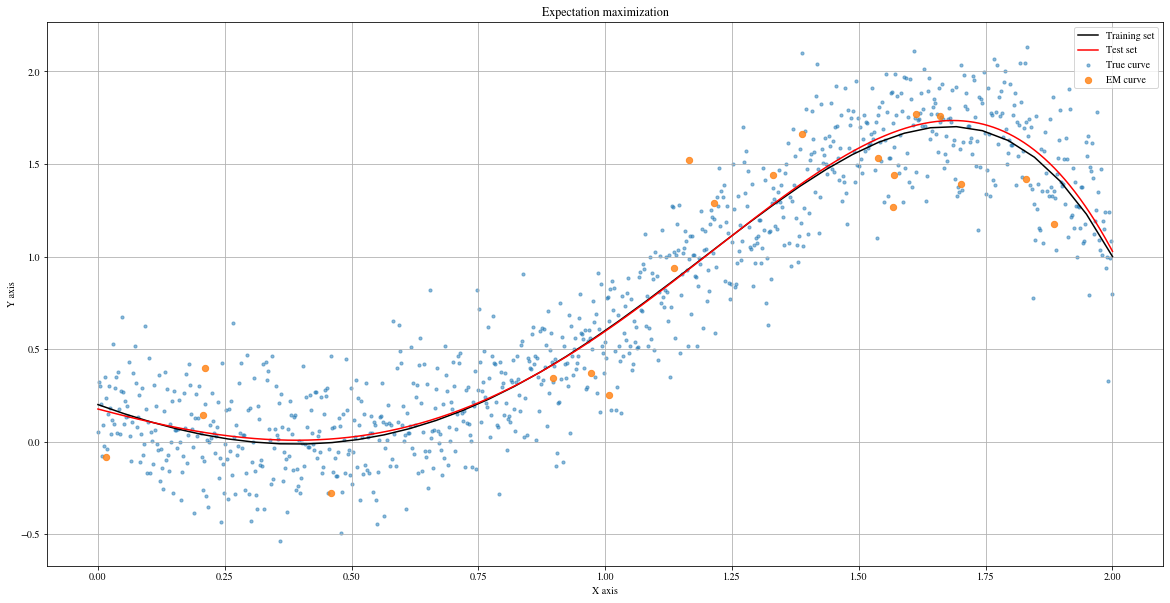

In [52]:
theta_true = np.array([-1, 0.9, 0.7, -0.2, 0.2])

# A function that takes as input training points and returns the Phi Matrix
def get_Phi_matrix(x):
    return np.column_stack((x**1, x**2, x**3, x**5, np.ones(len(x))))

N_train = 1000
x_train = np.linspace(start, end, N_train)
Phi_train = get_Phi_matrix(x_train)
y_train = np.dot(Phi_train, theta_true) + np.random.normal(0, variance_noise ** 0.5, N_train)

#calculates alpha and beta, given: x_axis, y_axis, K = degree of polynomial, num_iterations = loops to run
def em_algo_multi(x, y, K, num_iterations):
    alpha, beta = 1, 1

    Phi_em = get_Phi_matrix(x)
    
    for i in range(num_iterations):
        #### EXPECTATION STEP ####

        # calculates Σ_θ|y
        cov_theta_y = np.linalg.inv(alpha * np.eye(K) + beta * np.transpose(Phi_em) @ Phi_em)
        # calculates μ_θ|y
        mu_theta_y = beta * cov_theta_y @ np.transpose(Phi_em) @ y

        A = np.linalg.norm(mu_theta_y) ** 2 + np.matrix.trace(cov_theta_y)
        B = np.linalg.norm(y - Phi_em @ mu_theta_y) ** 2 + np.matrix.trace(Phi_em @ cov_theta_y @ np.transpose(Phi_em))

        #### MAXIMIZATION STEP ####
        # improves on α and β
        alpha = K / A
        beta = len(x) / B

    return mu_theta_y, cov_theta_y, alpha, beta

# returns θ_EM, α and b
theta_EM, cov, alpha, beta = em_algo_multi(x_train, y_train, 5, 20)

print(f"True θ is:      {theta_true}\nPredicted θ is: {theta_EM}")
print(f"True noise variance is:      {variance_noise}\nPredicted noise variance is: {1/beta}")

plt.figure(figsize=(20,10))
plt.scatter(   
            x_train,
            y_train,
            marker = "o", 
            s=10, 
            alpha=0.50
        )
plt.scatter(   
            x_test,
            y_test,
            marker = "o", 
            s=40, 
            alpha=0.8
        )
plt.plot(
            x_true,
            y_true,
            color = 'black'
)
plt.plot(
            x_train,
            np.dot(Phi_train, theta_EM),
            color = 'red'
)

plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend(["Training set", "Test set", "True curve", "EM curve"])
plt.title(f"Expectation maximization")
plt.grid()
plt.show()

To evaluate the algorithm's speed of convergence, we construct a training set and a test set with the same parameters as before and plot their MSEs against the number of iterations. 

In [53]:
MSE_train_list = []
MSE_test_list = []


step = 1
iteration_size = [i for i in range(step, 100 + step, step)]

N_train = 500
N_test = 20

x_train = np.linspace(start, end, N_train)
Phi_train = get_Phi_matrix(x_train)
y_train = np.dot(Phi_train, theta_true) + np.random.normal(0, variance_noise ** 0.5, N_train)

x_test = np.sort(np.random.uniform(0, 2, N_test))
Phi_test = get_Phi_matrix(x_test)
y_test = np.dot(Phi_test, theta_true) + np.random.normal(0, variance_noise ** 0.5, N_test)


for loops in iteration_size:
    MSE_train_total = 0
    MSE_test_total = 0

    theta_EM, cov, alpha, beta = em_algo_multi(x_train, y_train, 5, loops)

    MSE_train_list.append(((np.dot(Phi_train, theta_EM) - y_train)**2).mean())
    MSE_test_list.append(((np.dot(Phi_test, theta_EM) - y_test)**2).mean())

    print(f"data set {loops} complete")

data set 1 complete
data set 2 complete
data set 3 complete
data set 4 complete
data set 5 complete
data set 6 complete
data set 7 complete
data set 8 complete
data set 9 complete
data set 10 complete
data set 11 complete
data set 12 complete
data set 13 complete
data set 14 complete
data set 15 complete
data set 16 complete
data set 17 complete
data set 18 complete
data set 19 complete
data set 20 complete
data set 21 complete
data set 22 complete
data set 23 complete
data set 24 complete
data set 25 complete
data set 26 complete
data set 27 complete
data set 28 complete
data set 29 complete
data set 30 complete
data set 31 complete
data set 32 complete
data set 33 complete
data set 34 complete
data set 35 complete
data set 36 complete
data set 37 complete
data set 38 complete
data set 39 complete
data set 40 complete
data set 41 complete
data set 42 complete
data set 43 complete
data set 44 complete
data set 45 complete
data set 46 complete
data set 47 complete
data set 48 complete
d

Evidently, the algorithm converges to its final values after a handful of iterations ($<10$). Occasionally, the $MSE_{test}$ happens to be lower than the $MSE_{train}$; that is of no concern to the experiment, as we are only interested in the speed of convergence.

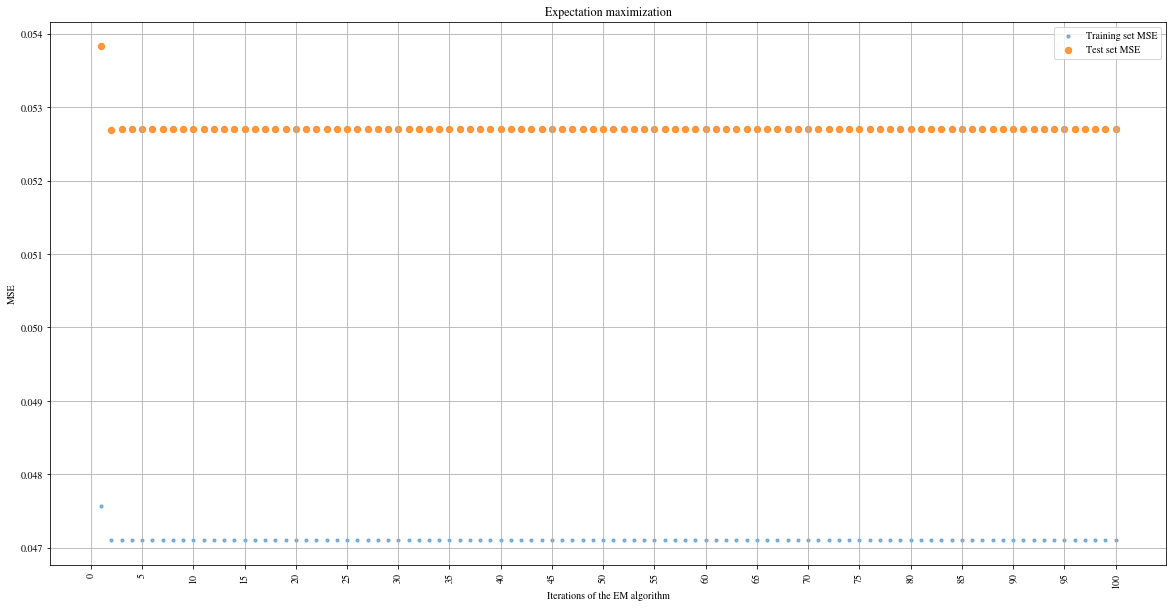

In [54]:
plt.figure(figsize=(20,10))
plt.scatter(   
            iteration_size,
            MSE_train_list,
            marker = "o", 
            s=10, 
            alpha=0.50
        )
plt.scatter(   
            iteration_size,
            MSE_test_list,
            marker = "o", 
            s=40, 
            alpha=0.8
        )

plt.xlabel("Iterations of the EM algorithm")
plt.ylabel("MSE")
plt.xticks(np.linspace(0, 100, int(100/5) + 1), rotation= 90)
plt.legend(["Training set MSE", "Test set MSE"])
plt.title(f"Expectation maximization")
plt.grid()
plt.show()

Since the training set is sufficiently larger than the test set, the model consistently yields lower $MSE_{train}$, compared to $MSE_{test}$; the model correctly extracts the noise from the data and accurately fits any new data points it encounters, avoiding any excessive overfitting.

In [55]:
MSE_train_list = []
MSE_test_list = []

loops = 5000
step = 10
data_size = [i for i in range(step, 500 + step, step)]

for data_set in data_size:
    N_train = data_set
    N_test = 20
    x_train = np.linspace(start, end, N_train)
    Phi_train = get_Phi_matrix(x_train)

    MSE_train_total = 0
    MSE_test_total = 0

    for _ in range(loops):
        y_train = np.dot(Phi_train, theta_true) + np.random.normal(0, variance_noise ** 0.5, N_train)
        x_test = np.sort(np.random.uniform(0, 2, N_test))
        Phi_test = get_Phi_matrix(x_test)
        y_test = np.dot(Phi_test, theta_true) + np.random.normal(0, variance_noise ** 0.5, N_test)

        theta_EM, cov, alpha, beta = em_algo_multi(x_train, y_train, 5, 7)
        MSE_train_total += ((np.dot(Phi_train, theta_EM) - y_train)**2).mean()
        MSE_test_total += ((np.dot(Phi_test, theta_EM) - y_test)**2).mean()

    MSE_train_list.append(MSE_train_total/loops)
    MSE_test_list.append(MSE_test_total/loops)

    print(f"data set {data_set} complete")

data set 10 complete
data set 20 complete
data set 30 complete
data set 40 complete
data set 50 complete
data set 60 complete
data set 70 complete
data set 80 complete
data set 90 complete
data set 100 complete
data set 110 complete
data set 120 complete
data set 130 complete
data set 140 complete
data set 150 complete
data set 160 complete
data set 170 complete
data set 180 complete
data set 190 complete
data set 200 complete
data set 210 complete
data set 220 complete
data set 230 complete
data set 240 complete
data set 250 complete
data set 260 complete
data set 270 complete
data set 280 complete
data set 290 complete
data set 300 complete
data set 310 complete
data set 320 complete
data set 330 complete
data set 340 complete
data set 350 complete
data set 360 complete
data set 370 complete
data set 380 complete
data set 390 complete
data set 400 complete
data set 410 complete
data set 420 complete
data set 430 complete
data set 440 complete
data set 450 complete
data set 460 comple

Observations:
- for current training set size ($=500$) and test set size ($=20$), in about 50% of the instances, $MSE_{test} > MSE_{train} $
- $size(training.set)→ {∞},  size(test.set) → {∞} \Rightarrow P(MSE_{test} - MSE_{train} = ε) = 1, ε > 0$

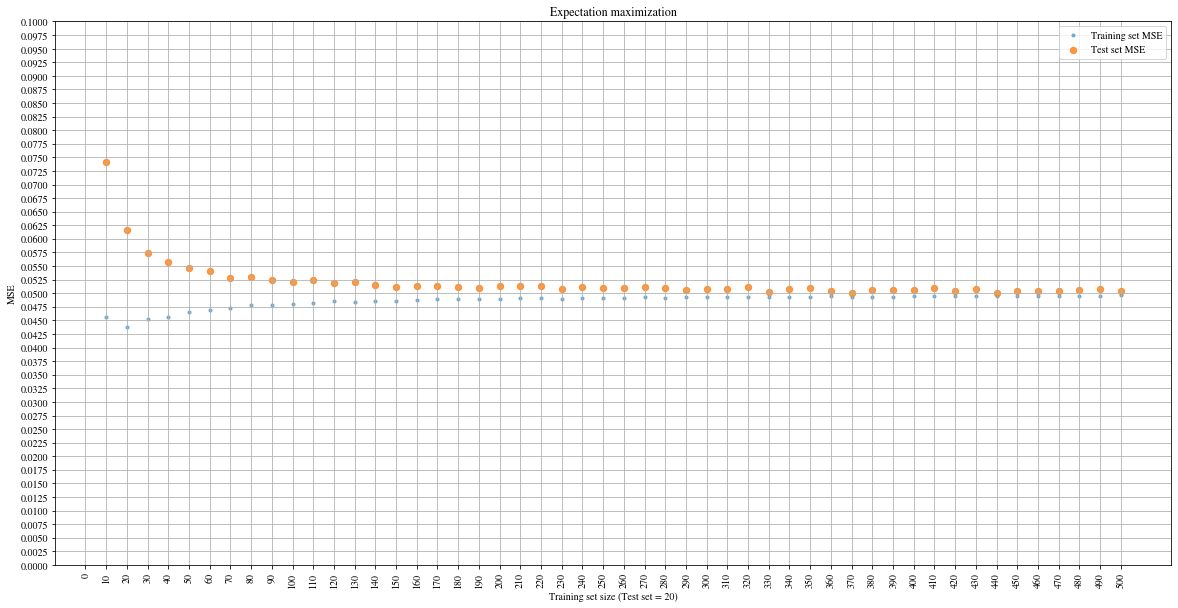

In [56]:
plt.figure(figsize=(20,10))
plt.scatter(   
            data_size,
            MSE_train_list,
            marker = "o", 
            s=10, 
            alpha=0.50
        )
plt.scatter(   
            data_size,
            MSE_test_list,
            marker = "o", 
            s=40, 
            alpha=0.8
        )

plt.xlabel("Training set size (Test set = 20)")
plt.ylabel("MSE")
plt.xticks(np.linspace(0, 500, int(500/step) + 1), rotation= 90)
plt.yticks(np.linspace(0, 0.1 , 40 + 1))
#plt.ylim([0.04, 0.06])
plt.legend(["Training set MSE", "Test set MSE"])
plt.title(f"Expectation maximization")
plt.grid()
plt.show()

---
---

# Exercise 1.7
Compare your results from the previous methods in terms of MSE on the test sets and comment on the results.

### Solution

In order to compare the results of the previous methods we use the MSE of the predictions on the test set and have a complete understanding of the bias - variance dilema. We train the model 1000 times with different noise samples and calculate the across 1000 runs vs the true labels of the model $y = \Phi \Theta_{true}$ (test set). 
In the end we plot the predictions of the models vs the True labels of the model.
- Additionally we calculate the MSE of each model
- The bias of each model 
- The variance of each model

The labels of the test set are generated by the true modle with the true parameter vector:

In [57]:
# Test set for the final evaluation with 100 points
X_test_final = np.linspace(0,2,100)
Phi_test_final = get_Phi_matrix(X_test_final)

# true labels by the true model and the true parameter vector
y_test_final = Phi_test_final @ theta_true

The training set is as follows, along with the $\Phi$ constructors for the different polynomial models:

In [58]:
# Train set for the final evaluation for modes that used a training set of 20 points
X_train_final_20 = np.linspace(0,2,20)
# Training set for the final evaluation for modes that used a training set of 500 points
X_train_final_500 = np.linspace(0,2,500)

# 5th degree polynomial with the 4th coefficient set to 0 Phi matrix for 500 points
Phi_train_final_500 = get_Phi_matrix(X_train_final_500)
# 5th degree polynomial with the 4th coefficient set to 0 Phi matrix for 20 points
Phi_train_final_20 = get_Phi_matrix(X_train_final_20)
# 2nd degree polynomial Phi matrix for 20 points
Phi_train_final_2nd_20 = get_Phi_matrix_2nd(X_train_final_20)
# 10th degree polynomial Phi matrix  for 20 points
Phi_train_final_10th_20 = get_Phi_matrix_10rd(X_train_final_20)

The labels of the train set are generated by the true model with the true parameter vector + noise corresponding to $\sigma^2_\eta$ equal to the noise values used to train the models in each of the above exercises.

We utilzie an instances of `GeneralizedLinearReggresion` class we built, which will be trained to correspond to the models and their parameters from the previous exercises, to train them and make predictions for the 1000 experiments ( with different noise samples) each with 100 test points.

In [59]:
model = GeneralizedLinearRegression()

#For the least squares models and for different polynomial degrees 
def final_evaluation_LS(X_train,X_test,y_test,sigma_eta,theta_true, polynomial_degree = 5):
  # Initialize the list to store the MSE results
  Predictions =[]
  # Construct the Phi matrix for the training label generation and the test set
  for i in range(0,1000):
      Phi_train = get_Phi_matrix(X_train)
      # We generate the noise samples, different for each iteration
      np.random.seed(i)
      # Generate training labels with noise variance = sigma_eta
      y_train = model.generate(Phi_train,theta_true,sigma_eta)
      # We compute the least squares estimate of theta

      if polynomial_degree == 2:
        # 2nd degree polynomial Phi matrix
        Phi_train = get_Phi_matrix_2nd(X_train)
        theta_ls = model.train_LS(Phi_train,y_train)
        # We compute the predictions for the test set
        Phi_test = get_Phi_matrix_2nd(X_test)
        y_pred = model.predict(Phi_test)

      elif polynomial_degree == 10:
        # 10th degree polynomial Phi matrix
        Phi_train = get_Phi_matrix_10rd(X_train)
        theta_ls = model.train_LS(Phi_train,y_train)
        # We compute the predictions for the test set
        Phi_test = get_Phi_matrix_10rd(X_test)
        y_pred = model.predict(Phi_test)

      else:
        # 5th degree polynomial with the 4th coefficient set to 0 Phi matrix
        Phi_train = get_Phi_matrix(X_train)
        theta_ls = model.train_LS(Phi_train,y_train)
        # We compute the predictions for the test set
        Phi_test = get_Phi_matrix(X_test)
        y_pred = model.predict(Phi_test)
      # We evaluate the model
      Predictions.append(y_pred)
  return np.array(Predictions)

#For the MAP models
def final_evaluation_MAP(Phi_train,Phi_test,y_test,sigma_eta,sigma_theta,theta_true,theta_zero):
  # Initialize the list to store the MSE results
  Predictions =[]
  for i in range(0,1000):
      # We generate the noise samples, different for each iteration
      np.random.seed(i)
      # Generate training labels with noise variance = sigma_eta
      y_train = model.generate(Phi_train,theta_true,sigma_eta)
      # We compute the MAP estimate of theta
      theta_map = model.train_MAP(Phi_train,y_train,theta_zero,sigma_eta,sigma_theta)
      #We make the predictions with the MAP estimate of theta
      y_pred = model.predict(Phi_test)
      # We evaluate the model
      Predictions.append(y_pred)
  Predictions = np.array(Predictions)
  return np.array(Predictions)


 We simulate each model of exercise 1.1 to 1.6. via its correponding number of points it was trained on,noise, parameters and structure of the $\Phi$ matrix.

##### 5th degree polynomial model with the coefficient of the 4th power equal to zero. Trained with the Least Squares(LS) method on $N =20$ points and noise variance set to $\sigma^2_\eta = 0.1$ 

The mean value of bias squared across prediction is:  6.251450030087513e-06
The variance is:  0.021987693723376597
The MSE is:  0.02199394517340669


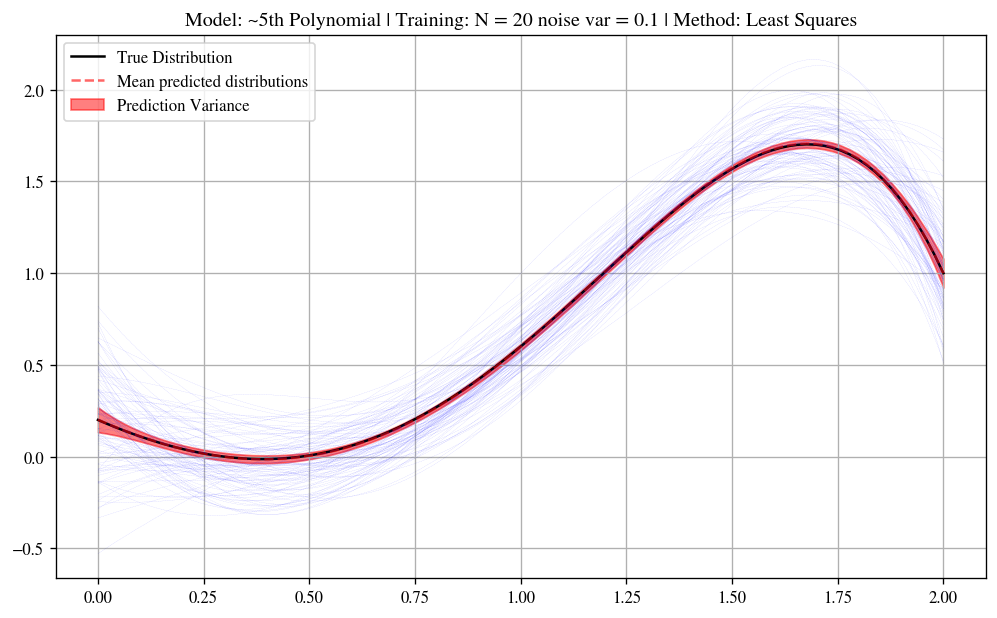

In [60]:
label_1 = 'Model: ~5th Polynomial | Training: N = 20 noise var = 0.1 | Method: Least Squares' 

# We pass the correspodning parameters to the instance of the class inside the function
Predictions_results_1 = final_evaluation_LS(X_train_final_20,X_test_final,y_test_final,0.1,theta_true)

# We compute the bias squared and the variance
avg_Predictions_1 = np.mean(Predictions_results_1,axis=0)
bias_squared_1 = ((avg_Predictions_1 - y_test_final)**2)
variance_1 = np.var(Predictions_results_1, axis = 0)
mse_1 =  np.mean(bias_squared_1 + variance_1)

# We print the results
print('The mean value of bias squared across prediction is: ', np.mean(bias_squared_1))
print('The variance is: ', np.mean(variance_1))
print('The MSE is: ', np.mean(bias_squared_1 + variance_1))

# We plot the results
plt.figure(figsize=(10,6),dpi=120)
plt.grid(True)
plt.title(label_1)
plt.plot(X_test_final, y_test_final, color = 'black', label='True Distribution')
plt.plot(X_test_final, avg_Predictions_1, linestyle = 'dashed',color = 'red',  label='Mean predicted distributions', alpha = 0.6)
for i in range(100):
  plt.plot(X_test_final, Predictions_results_1[i], linestyle = '-.',color = 'blue',  linewidth = 0.1, alpha = 0.4)
plt.fill_between(X_test_final, avg_Predictions_1 - variance_1, avg_Predictions_1 + variance_1, color='red', alpha=0.5, label='Prediction Variance')
plt.legend()
plt.show()

#### 5th degree polynomial model with the coefficient of the 4th power equal to zero. Trained with the Maximum a Posteriori(MAP) method on $N =20$ points, noise variance set to $\sigma^2_\eta = 0.05$. Prior variance set to $\sigma^2_\theta = 0.1$ and prior parameter vector set to $θ_0=\theta_{true}$

The mean value of bias squared across prediction is:  1.5226553305436001e-06
The variance is:  0.006816939273760093
The MSE is:  0.0068184619290906365


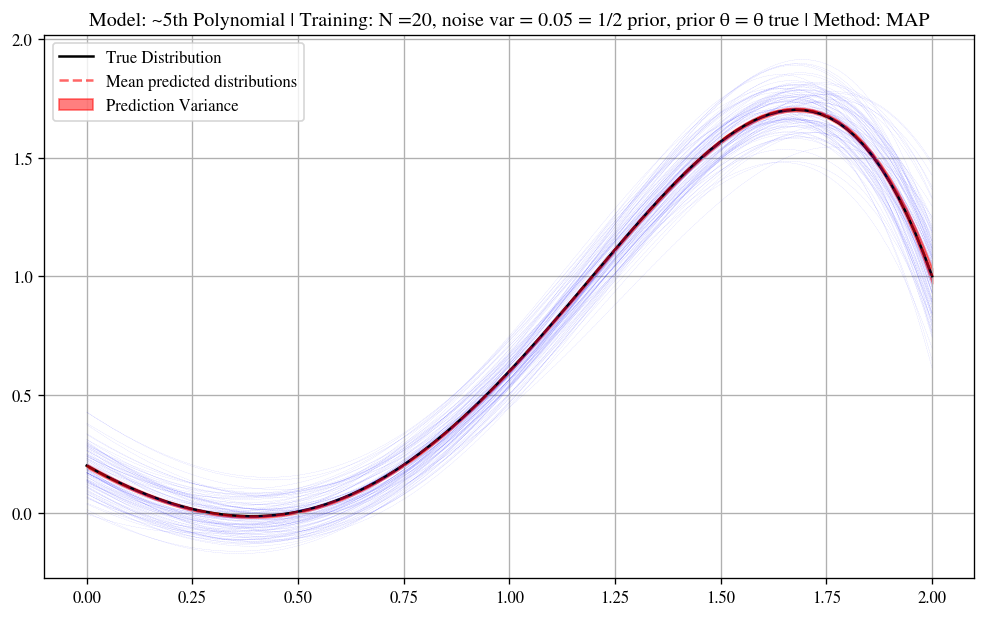

In [61]:
label_2 = 'Model: ~5th Polynomial | Training: N =20, noise var = 0.05 = 1/2 prior, prior θ = θ true | Method: MAP'
# We pass the correspodning parameters to the instance of the class inside the function

Predictions_results_2 = final_evaluation_MAP(Phi_train_final_20,Phi_test_final,y_test_final,0.05,0.1,theta_true,theta_true)

# We compute the bias squared and the variance
avg_Predictions_2 = np.mean(Predictions_results_2,axis=0)
bias_squared_2 = ((avg_Predictions_2 - y_test_final)**2)
variance_2 = np.var(Predictions_results_2, axis = 0)
mse_2 = np.mean(bias_squared_2 + variance_2)

# We print the results
print('The mean value of bias squared across prediction is: ', np.mean(bias_squared_2))
print('The variance is: ', np.mean(variance_2))
print('The MSE is: ', mse_2)

# We plot the results
plt.figure(figsize=(10,6),dpi=120)
plt.grid(True)
plt.title(label_2)
plt.plot(X_test_final, y_test_final, color = 'black', label='True Distribution')
plt.plot(X_test_final, avg_Predictions_2, linestyle = 'dashed',color = 'red',  label='Mean predicted distributions', alpha = 0.6)
for i in range(100):
  plt.plot(X_test_final, Predictions_results_2[i], linestyle = '-.',color = 'blue',  linewidth = 0.1, alpha = 0.4)
plt.fill_between(X_test_final, avg_Predictions_2 - variance_2, avg_Predictions_2 + variance_2, color='red', alpha=0.5, label='Prediction Variance')
plt.legend()
plt.show()

#### 5th degree polynomial model with the coefficient of the 4th power equal to zero. Trained with the Maximum a Posteriori (MAP) method on $N =20$ points, noise variance set to $\sigma^2_\eta = 0.15$. Prior variance set to $\sigma^2_\theta = 0.1$ and prior parameter vector set to $θ_0=\theta_{true}$

The mean value of bias squared across prediction is:  3.468460933805979e-06
The variance is:  0.017744120824347467
The MSE is:  0.01774758928528128


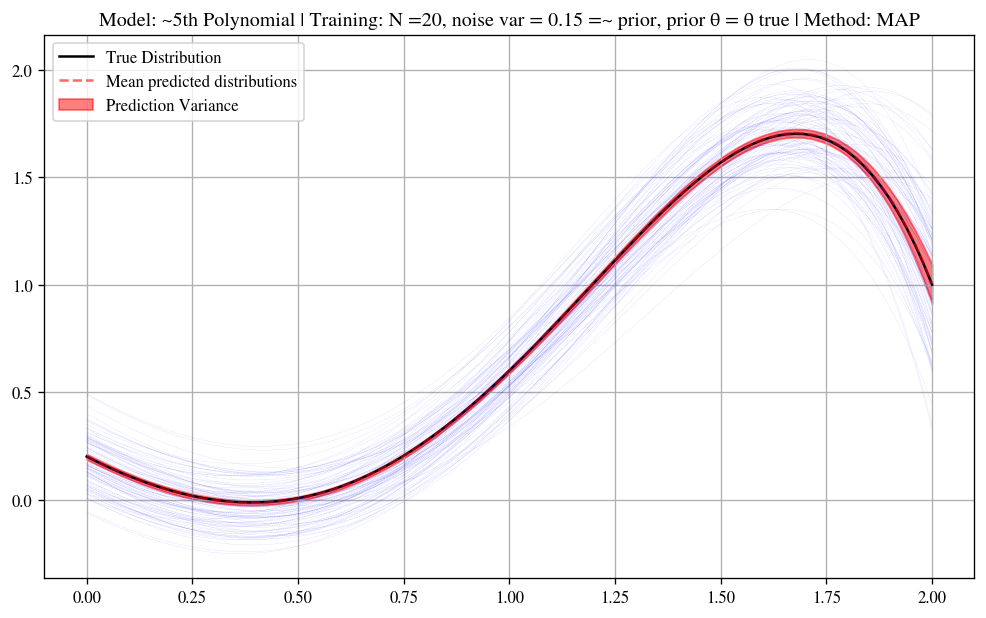

In [62]:
label_3 = 'Model: ~5th Polynomial | Training: N =20, noise var = 0.15 =~ prior, prior θ = θ true | Method: MAP'
# We pass the correspodning parameters to the instance of the class inside the function

Predictions_results_3 = final_evaluation_MAP(Phi_train_final_20,Phi_test_final,y_test_final,0.15,0.1,theta_true,theta_true)

# We compute the bias squared and the variance
avg_Predictions_3 = np.mean(Predictions_results_3,axis=0)
bias_squared_3 = ((avg_Predictions_3 - y_test_final)**2)
variance_3 = np.var(Predictions_results_3, axis = 0)
mse_3 = np.mean(bias_squared_3 + variance_3)

# We print the results
print('The mean value of bias squared across prediction is: ', np.mean(bias_squared_3))
print('The variance is: ', np.mean(variance_3))
print('The MSE is: ', mse_3)

# We plot the results
plt.figure(figsize=(10,6),dpi=120)
plt.grid(True)
plt.title(label_3)
plt.plot(X_test_final, y_test_final, color = 'black', label='True Distribution')
plt.plot(X_test_final, avg_Predictions_3, linestyle = 'dashed',color = 'red',  label='Mean predicted distributions', alpha = 0.6)
for i in range(100):
  plt.plot(X_test_final, Predictions_results_3[i], linestyle = '-.',color = 'blue',  linewidth = 0.1, alpha = 0.4)
plt.fill_between(X_test_final, avg_Predictions_3 - variance_3, avg_Predictions_3 + variance_3, color='red', alpha=0.5, label='Prediction Variance')
plt.legend()
plt.show()

##### 5th degree polynomial model with the coefficient of the 4th power equal to zero. Trained with the Maximum a Posteriori(MAP) method on $N =20$ points, noise variance set to $\sigma^2_\eta = 0.05$. Prior variance set to $\sigma^2_\theta = 0.1$ and prior parameter vector set to $θ_0=[-10.54,0.465,0.0087,-0.093,-0.004]^T$

The mean value of bias squared across prediction is:  0.2524517312548759
The variance is:  0.006816939273760095
The MSE is:  0.25926867052863595


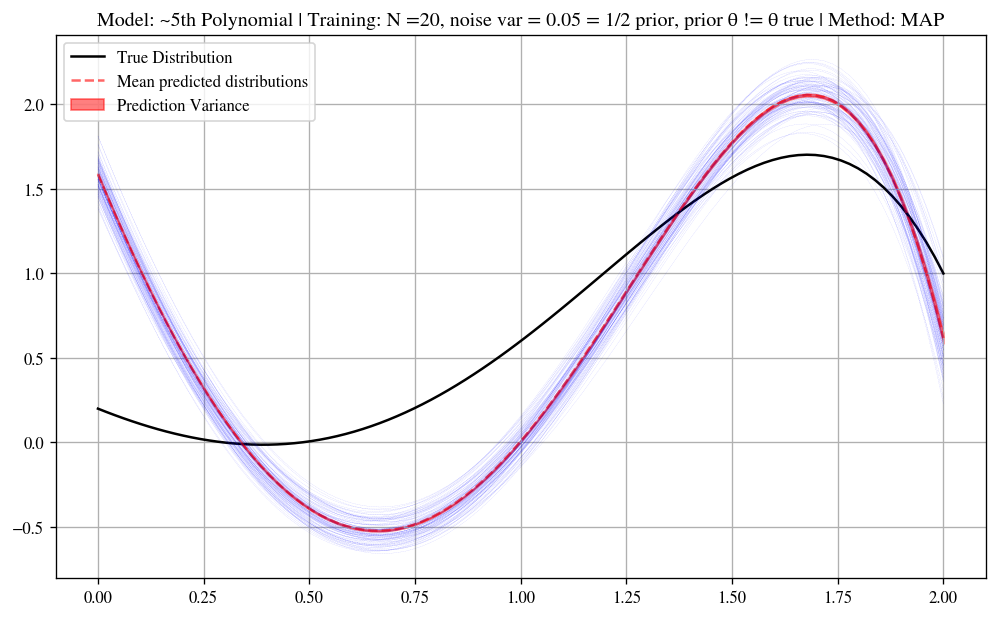

In [63]:
label_4 = 'Model: ~5th Polynomial | Training: N =20, noise var = 0.05 = 1/2 prior, prior θ != θ true | Method: MAP'
# We pass the correspodning parameters to the instance of the class inside the function

Predictions_results_4 = final_evaluation_MAP(Phi_train_final_20,Phi_test_final,y_test_final,0.05,0.1,theta_true,theta_zero)

# We compute the bias squared and the variance
avg_Predictions_4 = np.mean(Predictions_results_4,axis=0)
bias_squared_4 = ((avg_Predictions_4 - y_test_final)**2) 
variance_4 = np.var(Predictions_results_4, axis = 0)
mse_4 = np.mean(bias_squared_4 + variance_4)

# We print the results
print('The mean value of bias squared across prediction is: ', np.mean(bias_squared_4))
print('The variance is: ', np.mean(variance_4))
print('The MSE is: ', mse_4)

# We plot the results
plt.figure(figsize=(10,6),dpi=120)
plt.grid(True)
plt.title(label_4)
plt.plot(X_test_final, y_test_final, color = 'black', label='True Distribution')
plt.plot(X_test_final, avg_Predictions_4, linestyle = 'dashed',color = 'red',  label='Mean predicted distributions', alpha = 0.6)
for i in range(100):
  plt.plot(X_test_final, Predictions_results_4[i], linestyle = '-.',color = 'blue',  linewidth = 0.1, alpha = 0.4)
plt.fill_between(X_test_final, avg_Predictions_4 - variance_4, avg_Predictions_4 + variance_4, color='red', alpha=0.5, label='Prediction Variance')
plt.legend()
plt.show()


##### 5th degree polynomial model with the coefficient of the 4th power equal to zero. Trained with the  Maximum a Posteriori (MAP) method on $N =20$ points, noise variance set to $\sigma^2_\eta = 0.05$. Prior variance set to $\sigma^2_\theta = 2$ and prior parameter vector set to $θ_0=[-10.54,0.465,0.0087,-0.093,-0.004]^T$

The mean value of bias squared across prediction is:  0.005717562206426618
The variance is:  0.008792913429676343
The MSE is:  0.01451047563610296


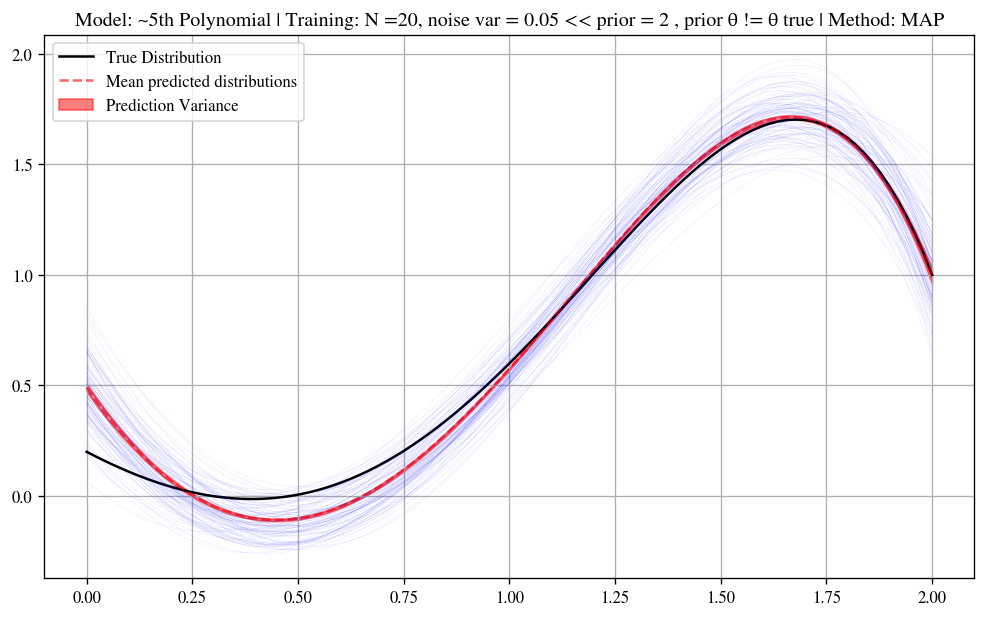

In [64]:
label_5 = 'Model: ~5th Polynomial | Training: N =20, noise var = 0.05 << prior = 2 , prior θ != θ true | Method: MAP'
# We pass the correspodning parameters to the instance of the class inside the function

Predictions_results_5 = final_evaluation_MAP(Phi_train_final_20,Phi_test_final,y_test_final,0.05,2,theta_true,theta_zero)

# We compute the bias squared and the variance
avg_Predictions_5 = np.mean(Predictions_results_5,axis=0)
bias_squared_5 = ((avg_Predictions_5 - y_test_final)**2)
variance_5 = np.var(Predictions_results_5, axis = 0)
mse_5 = np.mean(bias_squared_5 + variance_5)

# We print the results
print('The mean value of bias squared across prediction is: ', np.mean(bias_squared_5))
print('The variance is: ', np.mean(variance_5))
print('The MSE is: ', mse_5)

# We plot the results
plt.figure(figsize=(10,6),dpi=120)
plt.grid(True)
plt.title(label_5)
plt.plot(X_test_final, y_test_final, color = 'black', label='True Distribution')
plt.plot(X_test_final, avg_Predictions_5, linestyle = 'dashed',color = 'red',  label='Mean predicted distributions', alpha = 0.6)
for i in range(100):
  plt.plot(X_test_final, Predictions_results_5[i], linestyle = '-.',color = 'blue',  linewidth = 0.1, alpha = 0.4)
plt.fill_between(X_test_final, avg_Predictions_5 - variance_5, avg_Predictions_5 + variance_5, color='red', alpha=0.5, label='Prediction Variance')
plt.legend()
plt.show()


##### 5th degree polynomial model with the coefficient of the 4th power equal to zero. Trained with the Maximum a Posteriory (MAP) method on $N = 500$ points, noise variance set to $\sigma^2_\eta = 0.05$. Prior variance set to $\sigma^2_\theta = 0.1$ and prior parameter vector set to $θ_0=[-10.54,0.465,0.0087,-0.093,-0.004]^T$

The mean value of bias squared across prediction is:  0.006181998573328808
The variance is:  0.0003949540955768259
The MSE is:  0.006576952668905635


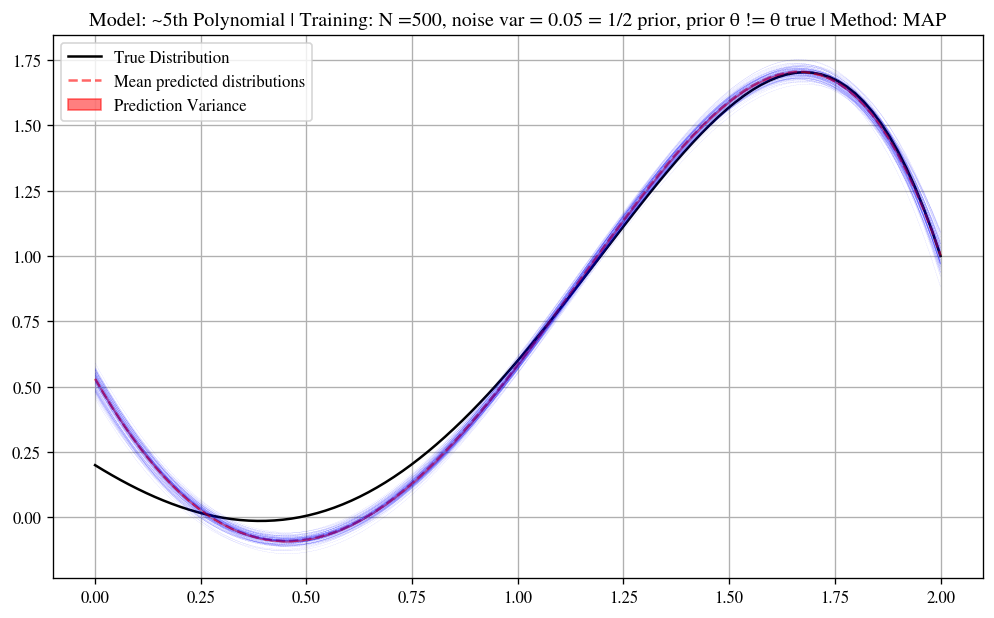

In [65]:
label_6 = 'Model: ~5th Polynomial | Training: N =500, noise var = 0.05 = 1/2 prior, prior θ != θ true | Method: MAP'
# We pass the correspodning parameters to the instance of the class inside the function

Predictions_results_6 = final_evaluation_MAP(Phi_train_final_500,Phi_test_final,y_test_final,0.05,0.1,theta_true,theta_zero)

# We compute the bias squared and the variance
avg_Predictions_6 = np.mean(Predictions_results_6,axis=0)
bias_squared_6 = ((avg_Predictions_6 - y_test_final)**2)
variance_6 = np.var(Predictions_results_6, axis = 0)
mse_6 = np.mean(bias_squared_6 + variance_6)

# We print the results
print('The mean value of bias squared across prediction is: ', np.mean(bias_squared_6))
print('The variance is: ', np.mean(variance_6))
print('The MSE is: ', mse_6)

# We plot the results
plt.figure(figsize=(10,6),dpi=120)
plt.grid(True)
plt.title(label_6)
plt.plot(X_test_final, y_test_final, color = 'black', label='True Distribution')
plt.plot(X_test_final, avg_Predictions_6, linestyle = 'dashed',color = 'red',  label='Mean predicted distributions', alpha = 0.6)
for i in range(100):
  plt.plot(X_test_final, Predictions_results_6[i], linestyle = '-.',color = 'blue',  linewidth = 0.1, alpha = 0.4)
plt.fill_between(X_test_final, avg_Predictions_6 - variance_6, avg_Predictions_6 + variance_6, color='red', alpha=0.5, label='Prediction Variance')
plt.legend()
plt.show()

##### 5th degree polynomial model with the coefficient of the 4th power equal to zero. Trained with the Maximum a Posteriory (MAP) method on $N = 500$ points, noise variance set to $\sigma^2_\eta = 0.05$. Prior variance set to $\sigma^2_\theta = 2$ and prior parameter vector set to $θ_0=[-10.54,0.465,0.0087,-0.093,-0.004]^T$

The mean value of bias squared across prediction is:  0.00014037784118867784
The variance is:  0.00048284370503180296
The MSE is:  0.0006232215462204808


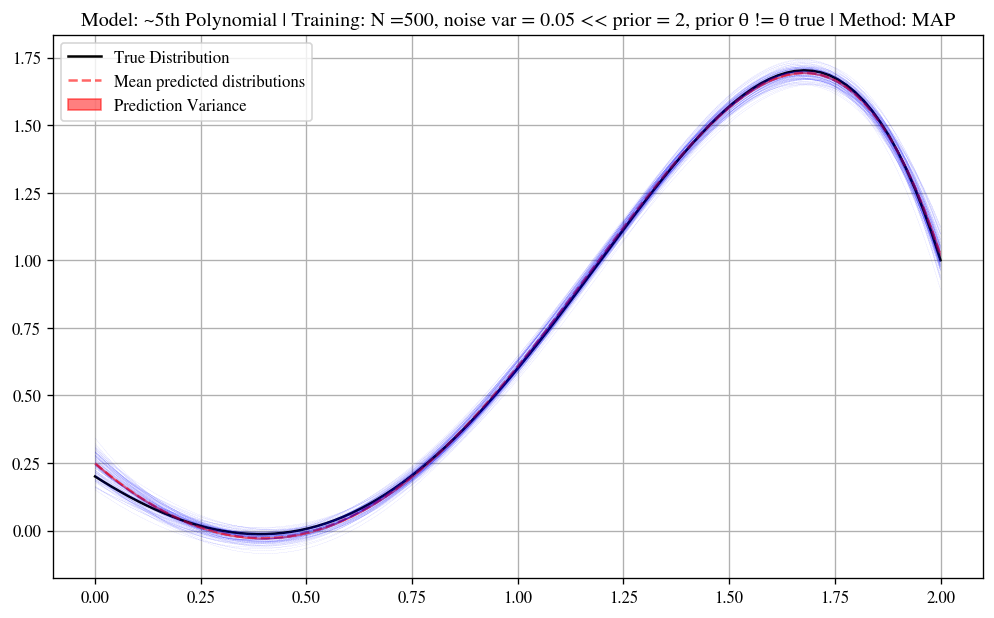

In [66]:
label_7 = 'Model: ~5th Polynomial | Training: N =500, noise var = 0.05 << prior = 2, prior θ != θ true | Method: MAP'
# We pass the correspodning parameters to the instance of the class inside the function

Predictions_results_7 = final_evaluation_MAP(Phi_train_final_500,Phi_test_final,y_test_final,0.05,2,theta_true,theta_zero)

# We compute the bias squared and the variance
avg_Predictions_7 = np.mean(Predictions_results_7,axis=0)
bias_squared_7 = ((avg_Predictions_7 - y_test_final)**2)
variance_7 = np.var(Predictions_results_7, axis = 0)
mse_7 = np.mean(bias_squared_7 + variance_7)

# We print the results
print('The mean value of bias squared across prediction is: ', np.mean(bias_squared_7))
print('The variance is: ', np.mean(variance_7))
print('The MSE is: ', mse_7)

# We plot the results
plt.figure(figsize=(10,6),dpi=120)
plt.grid(True)
plt.title(label_7)
plt.plot(X_test_final, y_test_final, color = 'black', label='True Distribution')
plt.plot(X_test_final, avg_Predictions_7, linestyle = 'dashed',color = 'red',  label='Mean predicted distributions', alpha = 0.6)
for i in range(100):
  plt.plot(X_test_final, Predictions_results_7[i], linestyle = '-.',color = 'blue',  linewidth = 0.1, alpha = 0.4)
plt.fill_between(X_test_final, avg_Predictions_7 - variance_7, avg_Predictions_7 + variance_7, color='red', alpha=0.5, label='Prediction Variance')
plt.legend()
plt.show()

#### 2nd degree polynomial model. Trained with the Least Squares method on $N = 20$ points, noise variance set to $\sigma^2_\eta = 0.1$

The mean value of bias squared across prediction is:  0.06522299835049326
The variance is:  0.01416504455414577
The MSE is:  0.07938804290463904


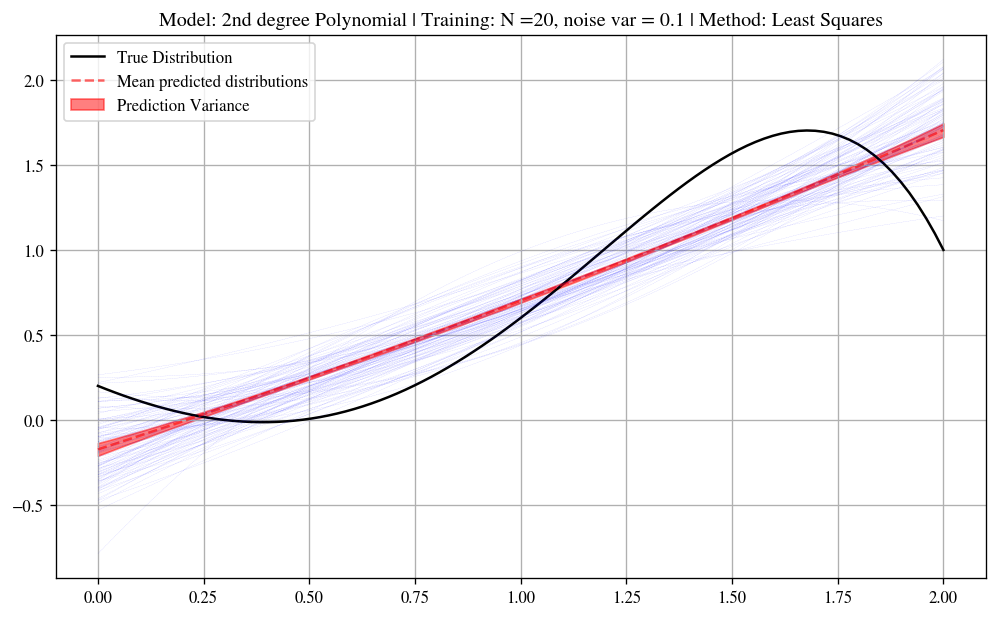

In [67]:
label_8 = 'Model: 2nd degree Polynomial | Training: N =20, noise var = 0.1 | Method: Least Squares'
# We pass the correspodning parameters to the instance of the class inside the function

Predictions_results_8 = final_evaluation_LS(X_train_final_20,X_test_final,y_test_final,0.1,theta_true,2)

# We compute the bias squared and the variance
avg_Predictions_8 = np.mean(Predictions_results_8,axis=0)
bias_squared_8 = ((avg_Predictions_8 - y_test_final)**2)
variance_8 = np.var(Predictions_results_8, axis = 0)
mse_8 = np.mean(bias_squared_8 + variance_8)

# We print the results
print('The mean value of bias squared across prediction is: ', np.mean(bias_squared_8))
print('The variance is: ', np.mean(variance_8))
print('The MSE is: ', mse_8)

# We plot the results
plt.figure(figsize=(10,6),dpi=120)
plt.grid(True)
plt.title(label_8)
plt.plot(X_test_final, y_test_final, color = 'black', label='True Distribution')
plt.plot(X_test_final, avg_Predictions_8, linestyle = 'dashed',color = 'red',  label='Mean predicted distributions', alpha = 0.6)
for i in range(100):
  plt.plot(X_test_final, Predictions_results_8[i], linestyle = '-.',color = 'blue',  linewidth = 0.1, alpha = 0.4)
plt.fill_between(X_test_final, avg_Predictions_8 - variance_8, avg_Predictions_8 + variance_8, color='red', alpha=0.5, label='Prediction Variance')
plt.legend()
plt.show()

#### 10th degree polynomial model. Trained with the Least Squares method on $N = 20$ points, noise variance set to $\sigma^2_\eta = 0.1$

The mean value of bias squared across prediction is:  5.3514410917912255e-05
The variance is:  0.05415350481849833
The MSE is:  0.054207019229416245


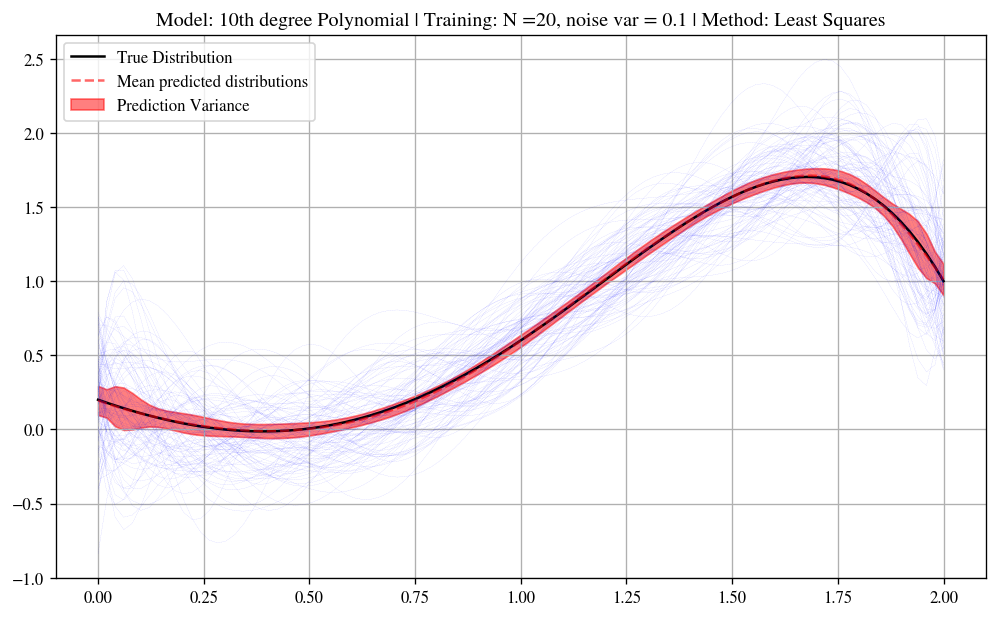

In [68]:
# We pass the correspodning parameters to the instance of the class inside the function
label_9 = 'Model: 10th degree Polynomial | Training: N =20, noise var = 0.1 | Method: Least Squares'

Predictions_results_9 = final_evaluation_LS(X_train_final_20,X_test_final,y_test_final,0.1,theta_true,10)

# We compute the bias squared and the variance
avg_Predictions_9 = np.mean(Predictions_results_9,axis=0)
bias_squared_9 = ((avg_Predictions_9 - y_test_final)**2)
variance_9 = np.var(Predictions_results_9, axis = 0)
mse_9 = np.mean(bias_squared_9 + variance_9)

# We print the results
print('The mean value of bias squared across prediction is: ', np.mean(bias_squared_9))
print('The variance is: ', np.mean(variance_9))
print('The MSE is: ', mse_9)

# We plot the results
plt.figure(figsize=(10,6),dpi=120)
plt.grid(True)
plt.title(label_9)
plt.plot(X_test_final, y_test_final, color = 'black', label='True Distribution')
plt.plot(X_test_final, avg_Predictions_9, linestyle = 'dashed',color = 'red',  label='Mean predicted distributions', alpha = 0.6)
for i in range(100):
  plt.plot(X_test_final, Predictions_results_9[i], linestyle = '-.',color = 'blue',  linewidth = 0.1, alpha = 0.4)
plt.fill_between(X_test_final, avg_Predictions_9 - variance_9, avg_Predictions_9 + variance_9, color='red', alpha=0.5, label='Prediction Variance')
plt.legend()
plt.show()

#### Model: ~5th Polynomial | Training: N = 20 noise var = 0.1 | Method: Ridge regression (λ = 0.085)


The mean value of bias squared across prediction is:  0.0038873198681436917
The variance is:  0.016311534708004942
The MSE is:  0.020198854576148638


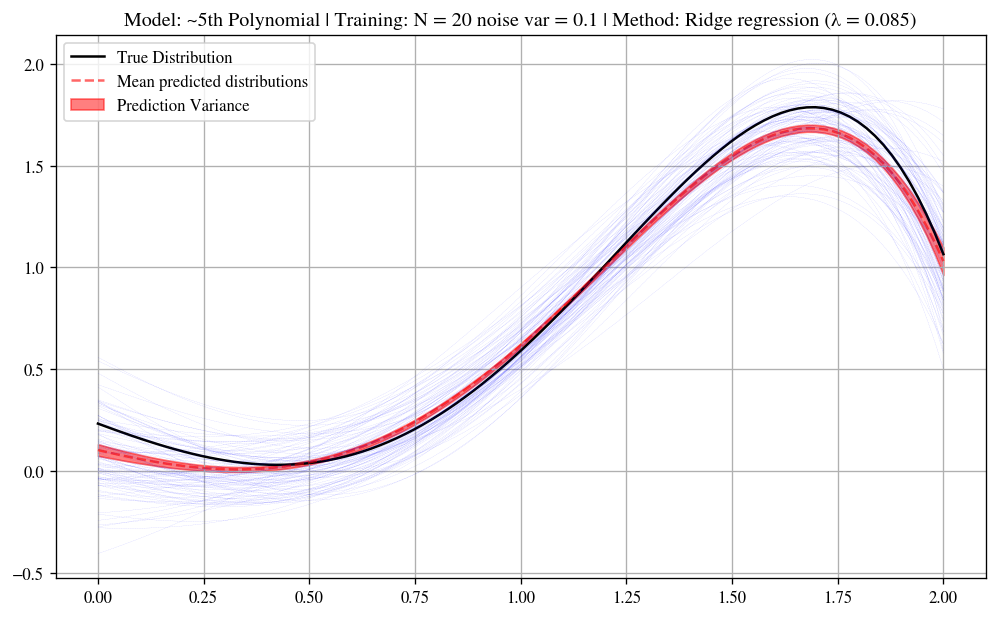

In [69]:
label_10 = 'Model: ~5th Polynomial | Training: N = 20 noise var = 0.1 | Method: Ridge regression (λ = 0.085)' 

start = 0
end = 2
N_train = 20
N_test = 1000

import math

#N equidistant points for x 
Χ_train = np.linspace(start, end, N_train)

#The corresponding Phi matrix generated is:
Phi_train = get_Phi_matrix(Χ_train)

# We pass the correspodning parameters to the instance of the class inside the function
Predictions_results_10 = []

# Construct the Phi matrix for the training label generation and the test set
for i in range(0,1000):
    Phi_train = get_Phi_matrix(X_train)
    # We generate the noise samples, different for each iteration
    np.random.seed(i)
    # Generate training labels with noise variance = sigma_eta
    y_train = np.dot(Phi_train, theta_true) + np.random.normal(0, math.sqrt(0.1), N_train)
    # We compute the least squares estimate of theta

    # 5th degree polynomial with the 4th coefficient set to 0 Phi matrix
    theta_RR = np.dot((np.dot(np.linalg.inv(np.dot(Phi_train.T, Phi_train) + 0.085 * np.diag(np.ones(Phi_train.shape[1]), 0)), Phi_train.T)), y_train)
    
    # We compute the predictions for the test set
    Phi_test_final = get_Phi_matrix(X_test_final)
    y_test_final = np.dot(Phi_test_final, theta_RR)
    
    # We evaluate the model
    Predictions_results_10.append(y_test_final)

# We compute the bias squared and the variance
avg_Predictions_10 = np.mean(Predictions_results_10, axis=0)
bias_squared_10 = ((avg_Predictions_10 - y_test_final)**2)
variance_10 = np.var(Predictions_results_10, axis = 0)
mse_10 =  np.mean(bias_squared_10 + variance_10)

# We print the results
print('The mean value of bias squared across prediction is: ', np.mean(bias_squared_10))
print('The variance is: ', np.mean(variance_10))
print('The MSE is: ', np.mean(bias_squared_10 + variance_10))

# We plot the results
plt.figure(figsize=(10,6),dpi=120)
plt.grid(True)
plt.title(label_10)
plt.plot(X_test_final, y_test_final, color = 'black', label='True Distribution')
plt.plot(X_test_final, avg_Predictions_10, linestyle = 'dashed',color = 'red',  label='Mean predicted distributions', alpha = 0.6)
for i in range(100):
  plt.plot(X_test_final, Predictions_results_10[i], linestyle = '-.',color = 'blue',  linewidth = 0.1, alpha = 0.4)
plt.fill_between(X_test_final, avg_Predictions_10 - variance_10, avg_Predictions_10 + variance_10, color='red', alpha=0.5, label='Prediction Variance')
plt.legend()
plt.show()

#### Model: ~5th Polynomial | Training: N = 500 noise var = 0.05 | Method: Expectation Maximization


The mean value of bias squared across prediction is:  0.0021361462286741666
The variance is:  0.0008594770740507063
The MSE is:  0.0029956233027248736


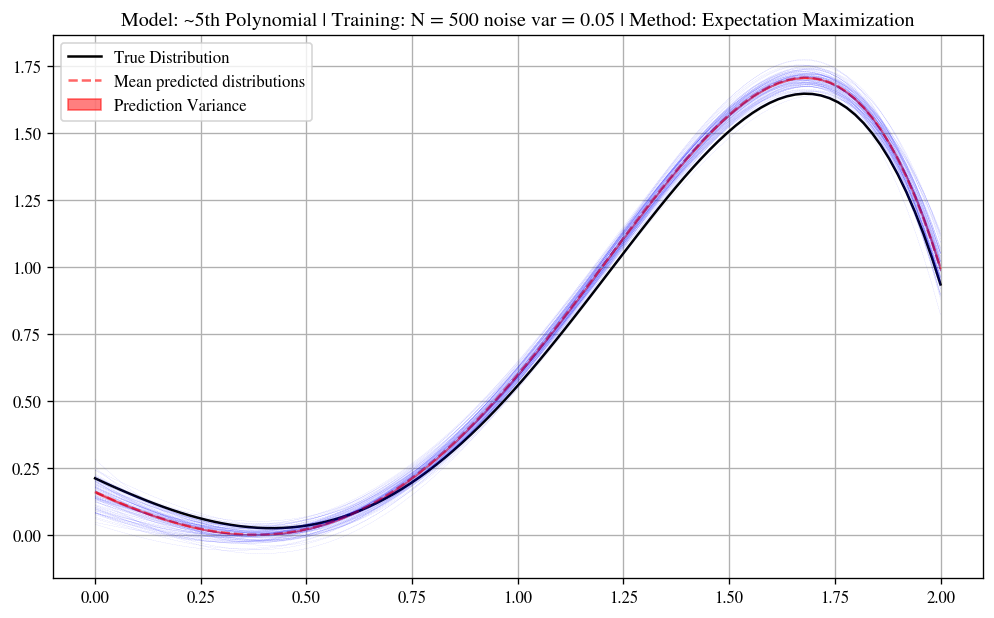

In [70]:
label_11 = 'Model: ~5th Polynomial | Training: N = 500 noise var = 0.05 | Method: Expectation Maximization' 

start = 0
end = 2
N_train = 500
N_test = 20

import math

#N equidistant points for x 
Χ_train = np.linspace(start, end, N_train)

#The corresponding Phi matrix generated is:
Phi_train = get_Phi_matrix(Χ_train)

# We pass the correspodning parameters to the instance of the class inside the function
Predictions_results_11 = []

# Construct the Phi matrix for the training label generation and the test set
for i in range(0,1000):
    # We generate the noise samples, different for each iteration
    np.random.seed(i)
    # Generate training labels with noise variance = sigma_eta
    y_train = np.dot(Phi_train, theta_true) + np.random.normal(0, math.sqrt(0.1), N_train)
    # We compute the least squares estimate of theta

    # 5th degree polynomial with the 4th coefficient set to 0 Phi matrix
    # returns θ_EM, α and b
    theta_EM, cov, alpha, beta = em_algo_multi(x_train, y_train, 5, 10)
    
    # We compute the predictions for the test set
    Phi_test_final = get_Phi_matrix(X_test_final)
    y_test_final = np.dot(Phi_test_final, theta_EM)
    
    # We evaluate the model
    Predictions_results_11.append(y_test_final)

# We compute the bias squared and the variance
avg_Predictions_11 = np.mean(Predictions_results_11, axis=0)
bias_squared_11 = ((avg_Predictions_11 - y_test_final)**2)
variance_11 = np.var(Predictions_results_11, axis = 0)
mse_11 =  np.mean(bias_squared_11 + variance_11)

# We print the results
print('The mean value of bias squared across prediction is: ', np.mean(bias_squared_11))
print('The variance is: ', np.mean(variance_11))
print('The MSE is: ', np.mean(bias_squared_11 + variance_11))

# We plot the results
plt.figure(figsize=(10,6),dpi=120)
plt.grid(True)
plt.title(label_11)
plt.plot(X_test_final, y_test_final, color = 'black', label='True Distribution')
plt.plot(X_test_final, avg_Predictions_11, linestyle = 'dashed',color = 'red',  label='Mean predicted distributions', alpha = 0.6)
for i in range(100):
  plt.plot(X_test_final, Predictions_results_11[i], linestyle = '-.',color = 'blue',  linewidth = 0.1, alpha = 0.4)
plt.fill_between(X_test_final, avg_Predictions_11 - variance_11, avg_Predictions_11 + variance_11, color='red', alpha=0.5, label='Prediction Variance')
plt.legend()
plt.show()

### Results of Exercise 1.7:

Summing up the results we get the following bar plot:

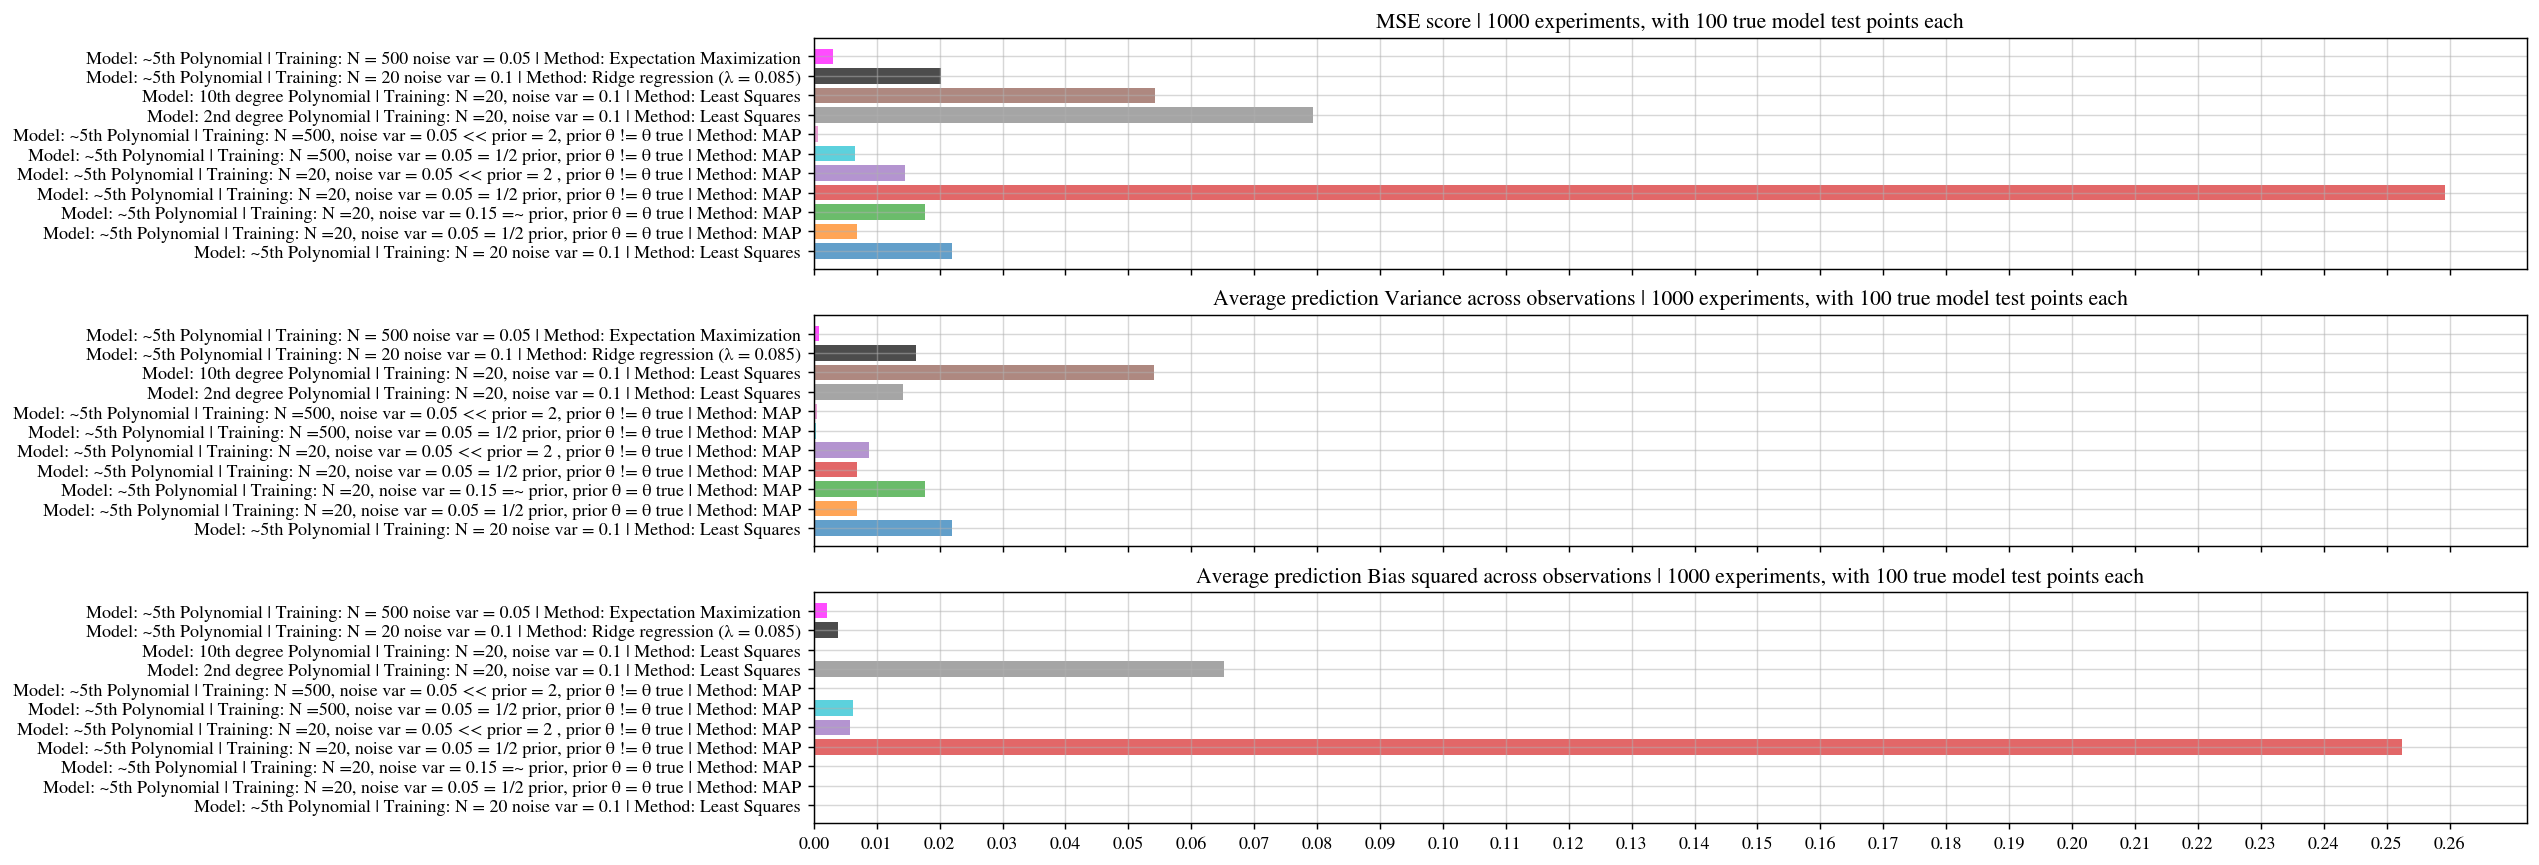

In [76]:
mse_scores = [mse_1,mse_2,mse_3,mse_4,mse_5,mse_6,mse_7,mse_8,mse_9, mse_10, mse_11]
mean_variance_score = [np.mean(variance_1),np.mean(variance_2),np.mean(variance_3),np.mean(variance_4),np.mean(variance_5),np.mean(variance_6),np.mean(variance_7),np.mean(variance_8),np.mean(variance_9), np.mean(variance_10), np.mean(variance_11)]
mean_bias_score = [np.mean(bias_squared_1),np.mean(bias_squared_2),np.mean(bias_squared_3),np.mean(bias_squared_4),np.mean(bias_squared_5),np.mean(bias_squared_6),np.mean(bias_squared_7),np.mean(bias_squared_8),np.mean(bias_squared_9), np.mean(bias_squared_10),np.mean(bias_squared_11)]

labels = [label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9, label_10, label_11]


# Plot the results
fig, (ax1, ax2 , ax3) = plt.subplots(3,1 , figsize=(17, 8),dpi=130, sharex=True)
plt.xticks(np.arange(0, 0.27, step=0.01))
#Subplot 1
ax1.barh(labels, mse_scores, color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:cyan','tab:pink','tab:gray','tab:brown', 'black', 'magenta'], alpha=0.7)
ax1.set_title('MSE score | 1000 experiments, with 100 true model test points each')
ax1.grid(True, alpha=0.5)
#Subplot 2
ax2.barh(labels, mean_variance_score, color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:cyan','tab:pink','tab:gray','tab:brown', 'black', 'magenta'], alpha=0.7)
ax2.grid(True, alpha=0.5)
ax2.set_title('Average prediction Variance across observations | 1000 experiments, with 100 true model test points each')
#Subplot 3
ax3.barh(labels, mean_bias_score, color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:cyan','tab:pink','tab:gray','tab:brown', 'black','magenta'], alpha=0.7)
ax3.grid(True, alpha=0.5)
ax2.grid(True, alpha=0.5)
ax3.set_title('Average prediction Bias squared across observations | 1000 experiments, with 100 true model test points each')
plt.show()

### Results of Exercise 1.8:
 #### Its important to note that the following points are explained thoroughly in the results section of each exercise. The following comments serve as a brief addition to the figure above: 


>Concerning ridge regression:
  From the results, one can notice the superior performance of ridge regression, compared to the least squares method, in terms of MSE. This improvement occurs by including additional bias in our least squares model, thus rendering our model less susceptible to noise variance. The histogram illustrates that exact added resistance to noise: 
  - $bias_{RR} > bias_{LS}$
  - $var_{RR} < var_{LS}$
  - $MSE_{RR} < MSE_{LS}$

>The expectation-maximization algorithm (EM), appears to have the 2nd best performance out of all tested approaches. One should note that:
  - the training set was sufficiently large, in order for our model to accurately capture the intrinsic characteristics of the data set. However, in 1.6, it was shown that, even with a fraction of our training set, the EM algorithm can achieve satisfactory performance.
  - due to the simplistic termination criterion and depending on the training set's parameters, the algorithm can be somewhat time-consuming to execute (even though it requires very few loops, as illustrated in 1.6), due to the multiple matrix multiplications, which could be a problem in real-life applications with frequent model updating.

>Regarding the models trained with the Maximum a Posteriori (MAP) method:
  - When the prior parameter vector is equal to the true vector and the prior variance is much lower than the noise variance, the model performs very well (as expected) with very low bias and variance. However, when the prior variance is equal or higher than the noise variance, the model performs gradually worse.
  - This holds opposite for the prior parameter vector, which is not equal to the true vector. When the prior variance is much lower than the noise variance, the model performs very poorly, with high bias and variance. Since the prior vector acts as a regularization parameter for a worse model. This is evident with the model depicted with the red bar in the plot. However, when the prior variance is much higher than the noise variance and when we have a substuntial training test like $N=500$ the model performs overcames the false regularization and performs very well, as depicted with the blue bar in the plot and in a more extrene case with the prink bar model (4th from the top), which is actually the best performing model in the plot.

 >Finally on the matter of the models with lower or higher order polynomials and the unbiased LS method: 
  - The model with the 10th degree polynomial performs very poorly and overfits the training set, with high bias and variance. This is due to the fact that the model is too complex compared to the true generating model.
  - The model with the 2nd degree polynomial performs even worse,since it consistently underfits the data. This is due to the fact that the model is too simple compared to the true generating model.

Thus the importance of choosing the right model complexity and parameters with the right methods is evident to achieve low bias and low variance, thus low MSE. Additionally one should be very carefull when choosing the prior parameters, since they can have a huge impact on the model's performance. Finally securing a big training in the context of the task at hand is always exremly beneficial for the model's performance, no matter the method used. 